# Prediction of Accident Severity & Pattern Extraction

## Problem Overview

Accidents in traffic lead to associated fatalities and economic losses every year worldwide and thus is an area of primary concern to Society from loss prevention point of view. Modelling accident severity prediction and improving the model are critical to the effective performance of road traffic systems for improved safety. In accident severity modelling, the input vectors are the characteristics of the accident, such as driver behaviour and attributes of vehicle, highway and environment characteristics while the output vector is the corresponding class of accident severity.

## Solution

1. Recognizing the key factors that influence accident severity
2. Build a model which involves prediction of accident severity based on the attributes of vehicel, highway ..etc.,

## ML Approach

Clasification problem to identify the severity

## Intended audience

1. Various Government Departments/Authorities like Police, R&B and Transport
The results of analysis and modelling can be used by these Departments to take appropriate measures to reduce accident impact and thereby improve traffic safety.
2. Insurance firms
It is also useful to the Insurers In assessing the claims made and better underwriting as well as rate making

## Importing standard python libraries¶

In [1]:
# general libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, StringIO, tempfile

## Importing packages required for pre-processing and analysis

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from catboost import CatBoostClassifier, CatBoostRegressor, CatboostError

# test and train split
from sklearn.model_selection import train_test_split

# Data Imbalance
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection,NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import EasyEnsemble, BalanceCascade
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

#Data Imputation
from fancyimpute import SoftImpute

# Grid and Random Search
import scipy.stats as stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc,confusion_matrix,log_loss

#import sys
#stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
#sys.stdout = stdout

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

## Load the Training data
This part of the notebook delas with loading the data

### Set Dataset directory

In [3]:
os.getcwd()

'C:\\Users\\CHADA19\\Python Files\\ML Practice'

In [4]:
# Folder containing the dataset for easy of use
datasetPath="C:/Work/PlayGround/Analytics/Hackathons/Final/20170916_Batch 28_CSE9099c_PHD_MLProblem"

In [5]:
os.chdir(datasetPath)

In [6]:
os.getcwd()

'C:\\Work\\PlayGround\\Analytics\\Hackathons\\Final\\20170916_Batch 28_CSE9099c_PHD_MLProblem'

### Read the dataset

In [7]:
### Reading the data 
accident_data = pd.read_csv("train_PHD.csv",na_values='NA',encoding='latin1')
accident_data_test = pd.read_csv("validation_PHD.csv",na_values='NA',encoding='latin1')
accident_pred = pd.read_csv("test_NoTarget_PHD.csv",na_values='NA',encoding='latin1')

## Verify the data
This part of the notebook deals with verification of the data obtained by reading the file

In [8]:
accident_data.columns

Index([u'Collision Reference No.', u'Policing Area', u'Collision Severity',
       u'Weekday of Collision', u'Day of Collision', u'Month of Collision',
       u'Hour of Collision (24 hour)', u'Carriageway Type', u'Speed Limit',
       u'Junction Detail', u'Junction Control',
       u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [9]:
accident_data.head()

,Collision Reference No.,Policing Area,Collision Severity,Weekday of Collision,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,3518,NaN,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,7.0,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [10]:
accident_data.dtypes

Collision Reference No.                     int64
Policing Area                              object
Collision Severity                          int64
Weekday of Collision                       object
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [11]:
print ('The train data has {0} rows and {1} columns'.format(accident_data.shape[0],accident_data.shape[1]))

The train data has 8562 rows and 17 columns


In [12]:
print ('The test data has {0} rows and {1} columns'.format(accident_data_test.shape[0],accident_data_test.shape[1]))

The test data has 1835 rows and 17 columns


In [13]:
# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

In [14]:
print "size of dataframe is: ",convert_size(accident_data.memory_usage().sum())

size of dataframe is:  1.11 MB


## Data Exploration

In [15]:
# Describing all the Numerical Features
accident_data.describe()

,Collision Reference No.,Collision Severity,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
count,8562.000000,8562.000000,8562.000000,8562.000000,8307.000000,8562.000000,8562.000000,8317.000000,8286.000000,8326.000000,8294.000000,8562.000000,8562.000000,8321.000000,8331.000000
mean,6549.375380,2.878416,15.702056,6.641556,13.669556,12.223896,42.463794,6.381027,4.144581,1.008167,2.216301,3.236744,4.743635,1.657133,1.060737
std,3927.957169,0.364021,8.801282,3.525814,5.075447,2.706829,14.530785,5.017856,2.866551,0.118775,3.237456,2.070228,3.746747,1.453808,0.495025
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3029.250000,3.000000,8.000000,4.000000,10.000000,13.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,6076.500000,3.000000,16.000000,7.000000,14.000000,13.000000,30.000000,6.000000,4.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000
75%,10078.750000,3.000000,23.000000,10.000000,17.000000,13.000000,60.000000,12.000000,7.000000,1.000000,1.000000,5.000000,9.000000,2.000000,1.000000
max,13147.000000,3.000000,31.000000,12.000000,23.000000,14.000000,70.000000,12.000000,7.000000,3.000000,12.000000,7.000000,10.000000,10.000000,6.000000


In [16]:
# Describing all the Categorical Features
accident_data.describe(include=['O'])

,Policing Area,Weekday of Collision
count,8317,8562
unique,40,7
top,BELC,FRI
freq,1074,1440


### Observation from categorical data statistics
1. It seems that most of the accidents are cocuuring on friday. 
2. The freq is the acciedents on fridays is 1440.
3. Most of the accidents are occuring in Belfast City
4. Around 1074 accidents occured in Belfast

### Missing values analysis

In [17]:

print ('The data is missing in {1} columns out of {0} '.format(len(accident_data.columns),len(accident_data.columns)-len(accident_data.columns[accident_data.isnull().any()])))

The data is missing in 9 columns out of 17 


In [18]:
# find the column nams where data is missing
accident_data.columns[accident_data.isnull().any()]

Index([u'Policing Area', u'Hour of Collision (24 hour)', u'Junction Detail',
       u'Junction Control', u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [19]:
#missing value counts in each of these columns
miss = accident_data.isnull().sum()/len(accident_data)
missing_values = miss[miss > 0]
missing_values.sort_values(inplace=True)
missing_values

Special Conditions at Site                0.026980
Pedestrian Crossing  Human Control       0.027564
Road Surface Conditions                   0.028148
Policing Area                             0.028615
Junction Detail                           0.028615
Hour of Collision (24 hour)               0.029783
Pedestrian Crossing  Physical Control    0.031301
Junction Control                          0.032235
dtype: float64

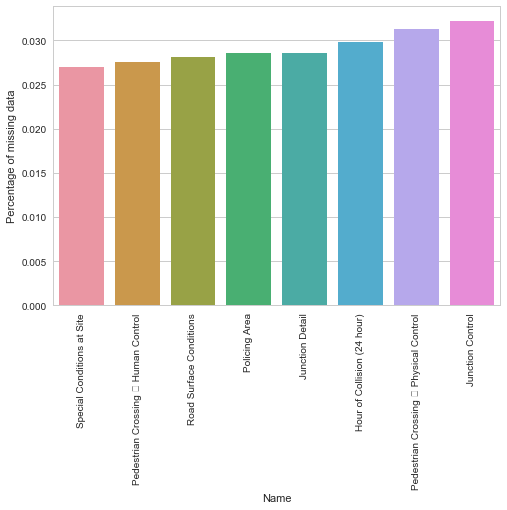

In [20]:
#visualising missing values
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.ylabel('Percentage of missing data')
sns.plt.show()


In [21]:
# finding the rows with more than 50% values missing
sum(accident_data.apply(lambda x: sum(x.isnull().values), axis = 1)>len(accident_data.columns)/2)

0

There are no rows with more than 50% of missing values

## Correlation Analysis

In [22]:
numeric_data = accident_data.select_dtypes(include=[np.number])

### Correlation without standardizing

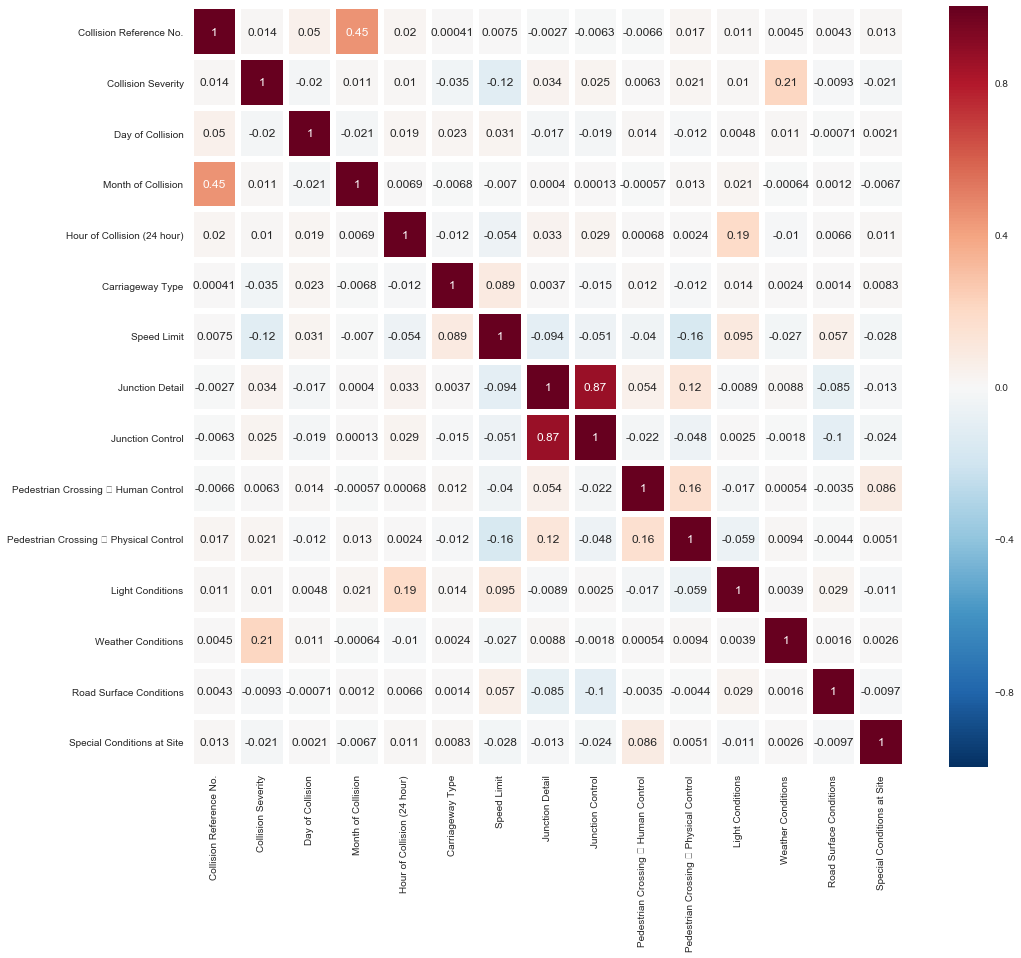

In [23]:
corr=numeric_data.corr()
plt.figure(figsize = (16,14))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,linewidths=5)

In [24]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Collision Reference No.,Collision Severity,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
Collision Reference No.,1,0.014,0.05,0.45,0.02,0.00041,0.0075,-0.0027,-0.0063,-0.0066,0.017,0.011,0.0045,0.0043,0.013
Collision Severity,0.014,1,-0.02,0.011,0.01,-0.035,-0.12,0.034,0.025,0.0063,0.021,0.01,0.21,-0.0093,-0.021
Day of Collision,0.05,-0.02,1,-0.021,0.019,0.023,0.031,-0.017,-0.019,0.014,-0.012,0.0048,0.011,-0.00071,0.0021
Month of Collision,0.45,0.011,-0.021,1,0.0069,-0.0068,-0.007,0.0004,0.00013,-0.00057,0.013,0.021,-0.00064,0.0012,-0.0067
Hour of Collision (24 hour),0.02,0.01,0.019,0.0069,1,-0.012,-0.054,0.033,0.029,0.00068,0.0024,0.19,-0.01,0.0066,0.011
Carriageway Type,0.00041,-0.035,0.023,-0.0068,-0.012,1,0.089,0.0037,-0.015,0.012,-0.012,0.014,0.0024,0.0014,0.0083
Speed Limit,0.0075,-0.12,0.031,-0.007,-0.054,0.089,1,-0.094,-0.051,-0.04,-0.16,0.095,-0.027,0.057,-0.028
Junction Detail,-0.0027,0.034,-0.017,0.0004,0.033,0.0037,-0.094,1,0.87,0.054,0.12,-0.0089,0.0088,-0.085,-0.013
Junction Control,-0.0063,0.025,-0.019,0.00013,0.029,-0.015,-0.051,0.87,1,-0.022,-0.048,0.0025,-0.0018,-0.1,-0.024
Pedestrian Crossing  Human Control,-0.0066,0.0063,0.014,-0.00057,0.00068,0.012,-0.04,0.054,-0.022,1,0.16,-0.017,0.00054,-0.0035,0.086


In [25]:
print (corr['Collision Severity'].sort_values(ascending=False)[:5], '\n') #top 15 values
print ('----------------------')
print (corr['Collision Severity'].sort_values(ascending=False)[-5:]) #last 5 values

(Collision Severity                        1.000000
Weather Conditions                        0.211636
Junction Detail                           0.033728
Junction Control                          0.024737
Pedestrian Crossing  Physical Control    0.020572
Name: Collision Severity, dtype: float64, '\n')
----------------------
Road Surface Conditions      -0.009317
Day of Collision             -0.019584
Special Conditions at Site   -0.021499
Carriageway Type             -0.034844
Speed Limit                  -0.115388
Name: Collision Severity, dtype: float64


### Correlation with standardization

In [26]:
# Standardizing the datset using mean and standard deviation
numeric_data=numeric_data.drop('Collision Reference No.',axis=1)
numeric_data

,Collision Severity,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,3,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,3,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,3,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,3,18,10,16.0,12,70,6.0,7.0,1.0,1.0,1,3,1.0,1.0
4,3,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0
5,2,3,2,12.0,13,60,1.0,1.0,1.0,1.0,2,2,2.0,NaN
6,2,26,1,16.0,13,40,6.0,7.0,1.0,1.0,1,1,2.0,5.0
7,3,24,10,11.0,13,60,10.0,7.0,1.0,1.0,1,10,2.0,1.0
8,3,10,2,15.0,1,30,1.0,1.0,1.0,1.0,1,3,1.0,NaN
9,3,5,12,8.0,13,30,1.0,1.0,1.0,2.0,7,10,1.0,1.0


In [27]:
# Calculating the mean and standard deviation of the dataset
mean=numeric_data.mean()
print mean
print "The SD value"
std=numeric_data.std()
print std

Collision Severity                         2.878416
Day of Collision                          15.702056
Month of Collision                         6.641556
Hour of Collision (24 hour)               13.669556
Carriageway Type                          12.223896
Speed Limit                               42.463794
Junction Detail                            6.381027
Junction Control                           4.144581
Pedestrian Crossing  Human Control        1.008167
Pedestrian Crossing  Physical Control     2.216301
Light Conditions                           3.236744
Weather Conditions                         4.743635
Road Surface Conditions                    1.657133
Special Conditions at Site                 1.060737
dtype: float64
The SD value
Collision Severity                         0.364021
Day of Collision                           8.801282
Month of Collision                         3.525814
Hour of Collision (24 hour)                5.075447
Carriageway Type                    

In [28]:
# Standardizing the training data with mean and standard deviation
numeric_data=numeric_data -(numeric_data.mean()/numeric_data.std())

In [29]:
numeric_data.head()

,Collision Severity,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,-4.907273,2.215935,6.116306,11.306729,8.484053,57.077667,-0.271664,-0.445843,-7.488053,0.315419,0.436528,7.733932,7.860143,-1.142793
1,-4.907273,6.215935,6.116306,14.306729,6.484053,47.077667,10.728336,5.554157,-7.488053,0.315419,2.436528,1.733932,-0.139857,-1.142793
2,-4.907273,3.215935,9.116306,14.306729,-3.515947,57.077667,10.728336,5.554157,-7.488053,0.315419,0.436528,0.733932,0.860143,-1.142793
3,-4.907273,16.215935,8.116306,13.306729,7.484053,67.077667,4.728336,5.554157,-7.488053,0.315419,-0.563472,1.733932,-0.139857,-1.142793
4,-4.907273,21.215935,9.116306,6.306729,8.484053,57.077667,4.728336,5.554157,-7.488053,0.315419,0.436528,1.733932,-0.139857,-1.142793


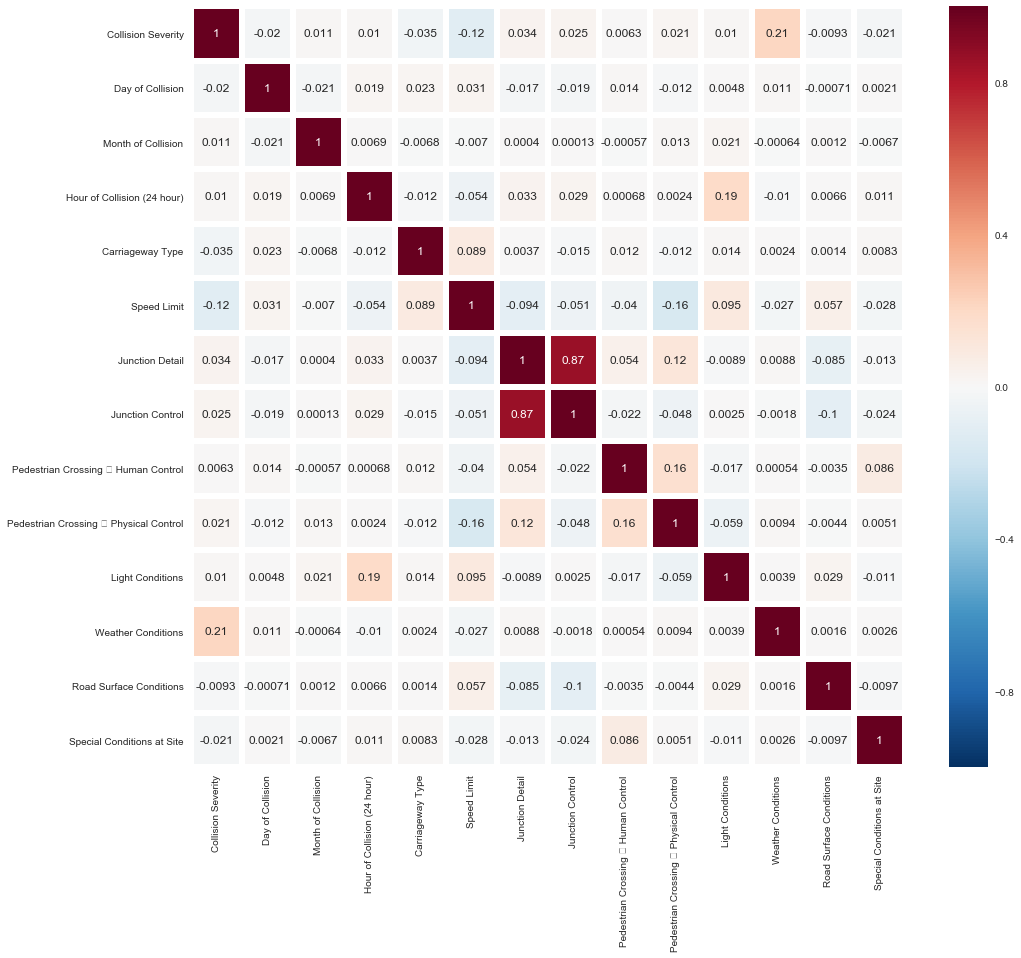

In [30]:
corr=numeric_data.corr()
plt.figure(figsize = (16,14))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,linewidths=5)

In [31]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Collision Severity,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
Collision Severity,1,-0.02,0.011,0.01,-0.035,-0.12,0.034,0.025,0.0063,0.021,0.01,0.21,-0.0093,-0.021
Day of Collision,-0.02,1,-0.021,0.019,0.023,0.031,-0.017,-0.019,0.014,-0.012,0.0048,0.011,-0.00071,0.0021
Month of Collision,0.011,-0.021,1,0.0069,-0.0068,-0.007,0.0004,0.00013,-0.00057,0.013,0.021,-0.00064,0.0012,-0.0067
Hour of Collision (24 hour),0.01,0.019,0.0069,1,-0.012,-0.054,0.033,0.029,0.00068,0.0024,0.19,-0.01,0.0066,0.011
Carriageway Type,-0.035,0.023,-0.0068,-0.012,1,0.089,0.0037,-0.015,0.012,-0.012,0.014,0.0024,0.0014,0.0083
Speed Limit,-0.12,0.031,-0.007,-0.054,0.089,1,-0.094,-0.051,-0.04,-0.16,0.095,-0.027,0.057,-0.028
Junction Detail,0.034,-0.017,0.0004,0.033,0.0037,-0.094,1,0.87,0.054,0.12,-0.0089,0.0088,-0.085,-0.013
Junction Control,0.025,-0.019,0.00013,0.029,-0.015,-0.051,0.87,1,-0.022,-0.048,0.0025,-0.0018,-0.1,-0.024
Pedestrian Crossing  Human Control,0.0063,0.014,-0.00057,0.00068,0.012,-0.04,0.054,-0.022,1,0.16,-0.017,0.00054,-0.0035,0.086
Pedestrian Crossing  Physical Control,0.021,-0.012,0.013,0.0024,-0.012,-0.16,0.12,-0.048,0.16,1,-0.059,0.0094,-0.0044,0.0051


In [32]:
print (corr['Collision Severity'].sort_values(ascending=False)[:8], '\n') #top 15 values
print ('----------------------')
print (corr['Collision Severity'].sort_values(ascending=False)[-5:]) #last 5 values

(Collision Severity                        1.000000
Weather Conditions                        0.211636
Junction Detail                           0.033728
Junction Control                          0.024737
Pedestrian Crossing  Physical Control    0.020572
Month of Collision                        0.010726
Light Conditions                          0.010455
Hour of Collision (24 hour)               0.010350
Name: Collision Severity, dtype: float64, '\n')
----------------------
Road Surface Conditions      -0.009317
Day of Collision             -0.019584
Special Conditions at Site   -0.021499
Carriageway Type             -0.034844
Speed Limit                  -0.115388
Name: Collision Severity, dtype: float64


### verify the distribution of class label

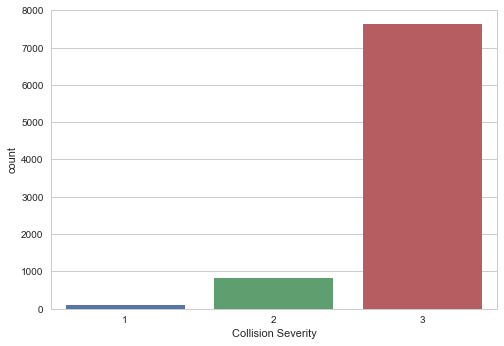

In [33]:
sns.countplot(accident_data['Collision Severity'])

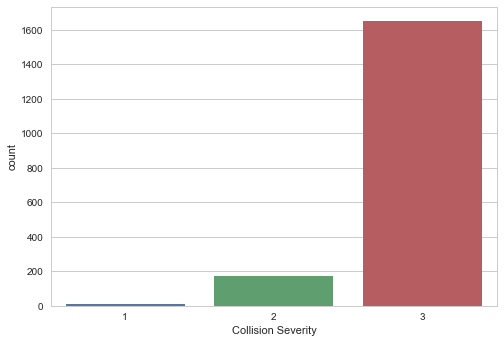

In [34]:
sns.countplot(accident_data_test['Collision Severity'])

### Univariate analysis

In [35]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=3, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

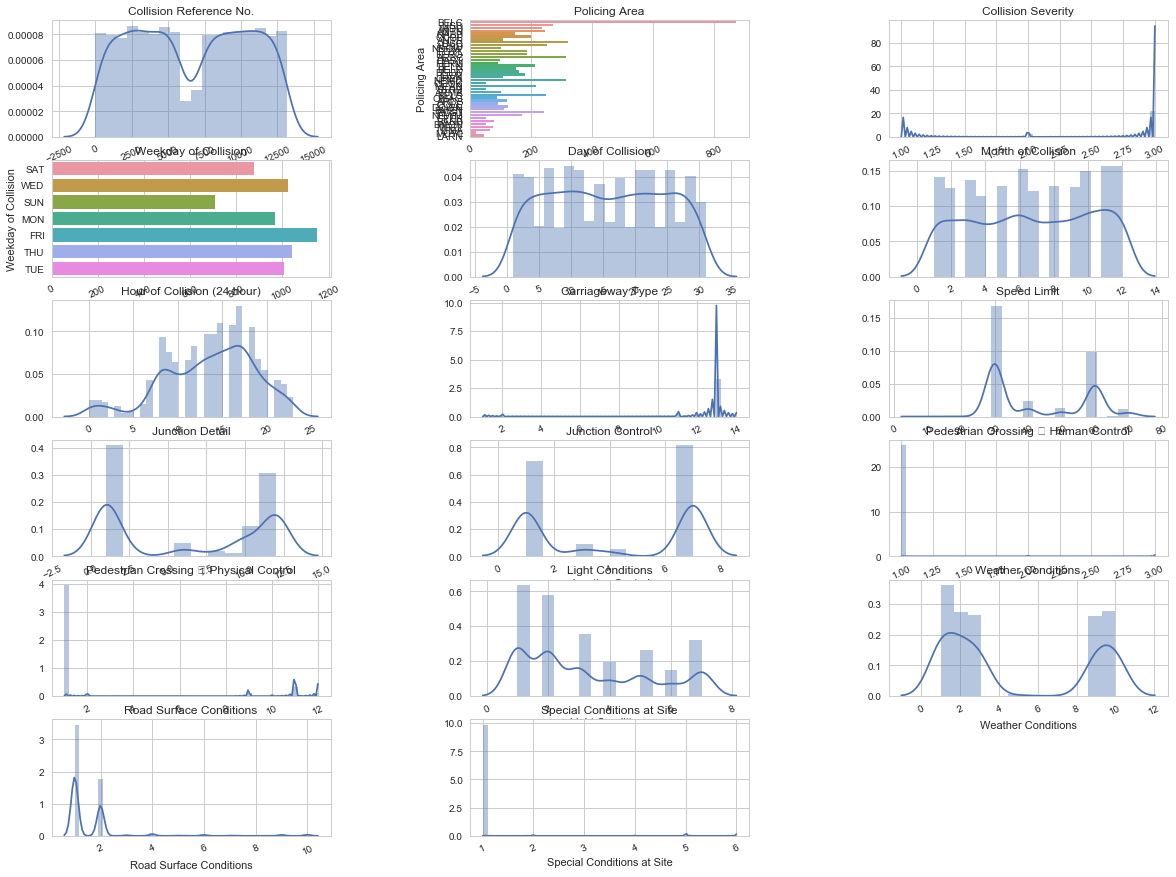

In [36]:
distData=accident_data.dropna()
plot_distribution(distData)

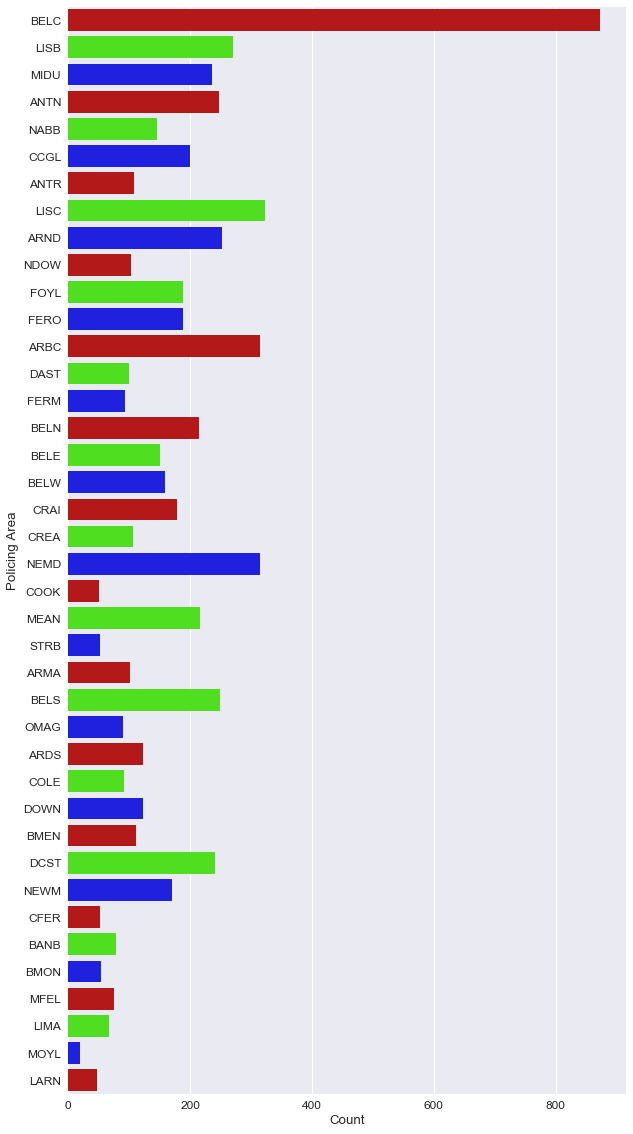

In [37]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,20)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Policing Area', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Policing Area")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()


Most of the accidents are occuring in Belfast City

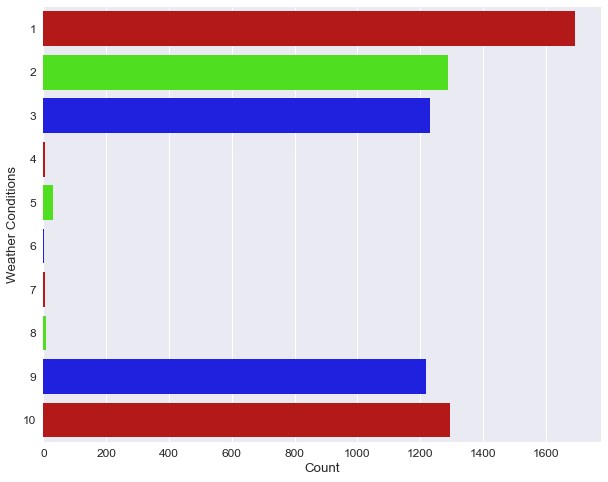

In [38]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,8)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Weather Conditions', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Weather Conditions")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Syrprisingly low collision when whether is Fine with high winds, Raining with high winds,Snowing with high winds,Fog or mist - if hazard, Strong sun (glaring)

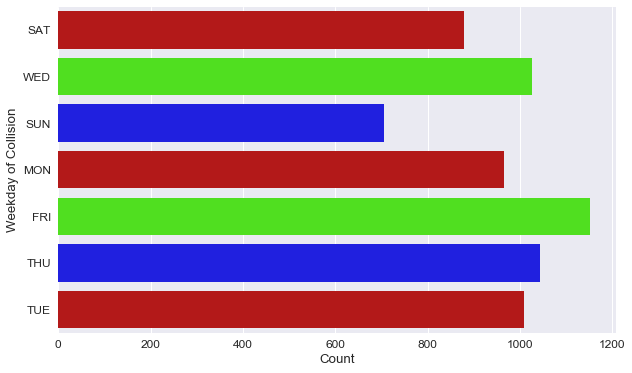

In [39]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Weekday of Collision', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Weekday of Collision")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

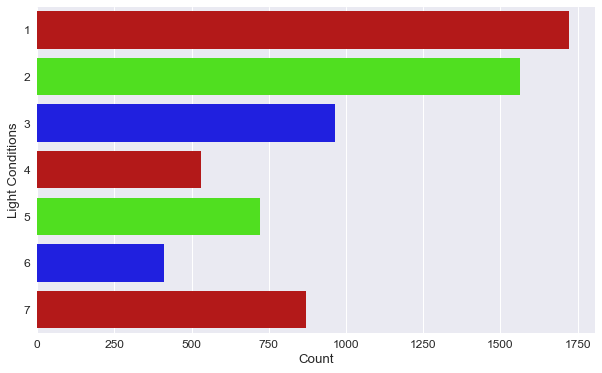

In [40]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Light Conditions', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Light Conditions")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

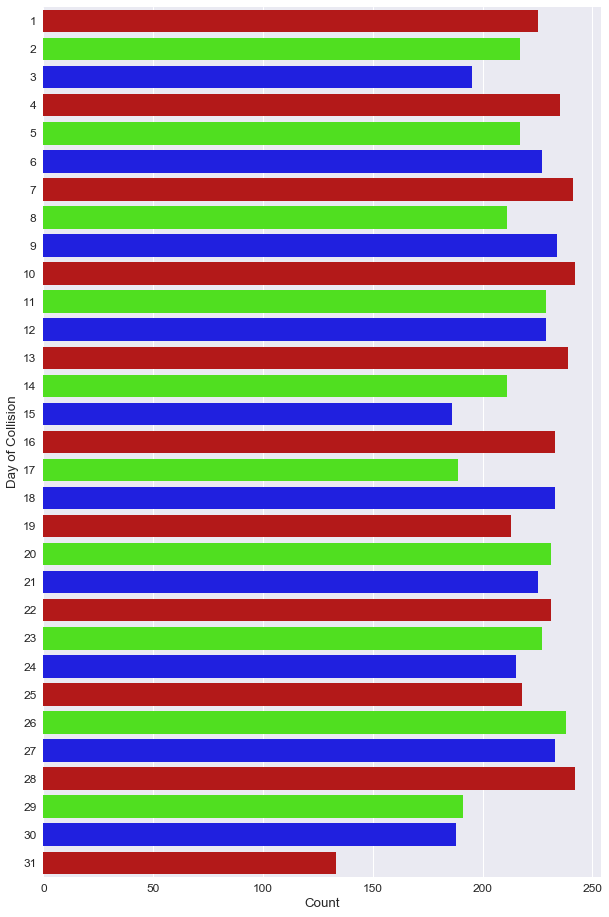

In [41]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,16)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Day of Collision', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Day of Collision")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Interestingly the collision count is less on the last of the month!!!

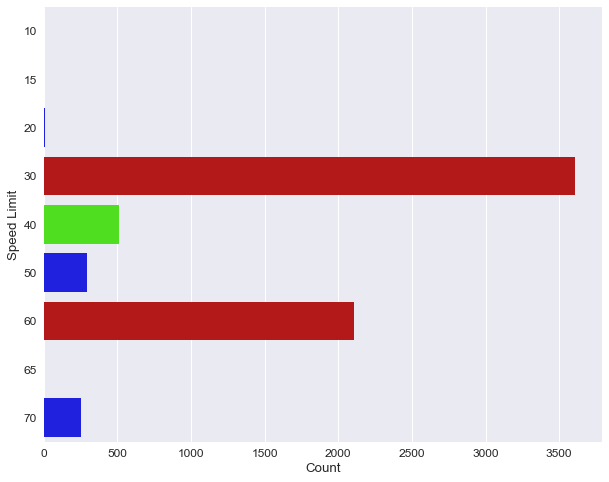

In [42]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,8)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Speed Limit', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Speed Limit")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Interestingly most of the accidents are occuring in places where there is a speed limit of 30 and 60. Very few are occuring where speed limit is 50 and 70

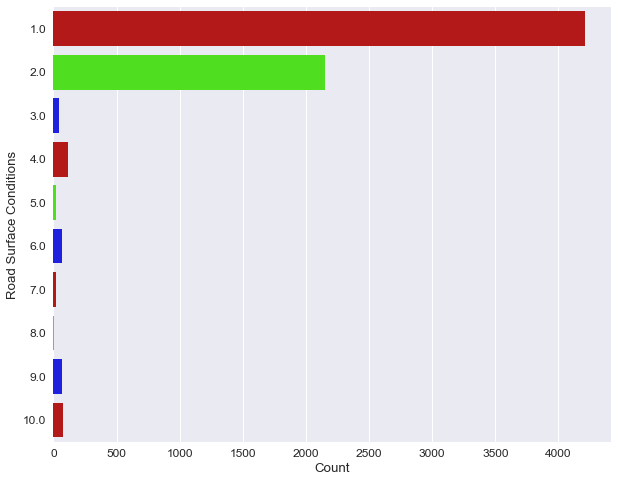

In [43]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,8)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Road Surface Conditions', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Road Surface Conditions")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Most of the accidents are occuring on dry and wet road conditions but accidents on dry roads seems to be more

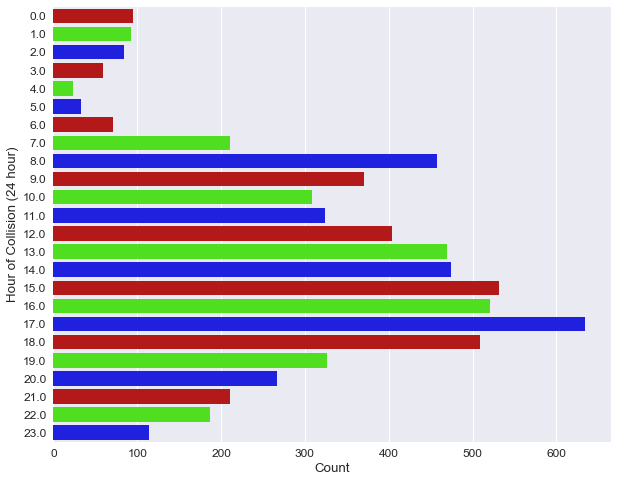

In [44]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,8)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Hour of Collision (24 hour)', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Hour of Collision (24 hour)")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Most of the accidents are coccuring between 7 AM and 8PM. which are busy hours. interestingly very few accidents seems to occur between 4 AM and 5 AM 

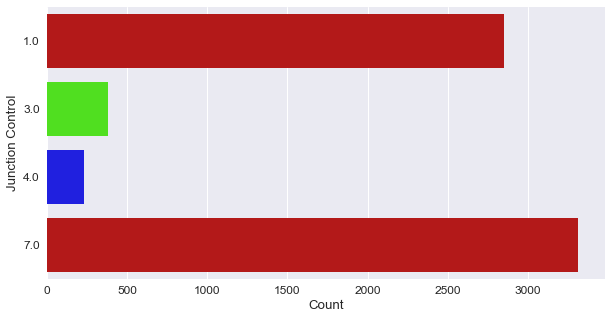

In [45]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,5)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Junction Control', data=distData,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Junction Control")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Most of the collisions are happening at the places which are not junctions and uncontrolled junctions

### Bivariate analysis

To get a quick glimpse of all variables in a data set, let's plot barplot for all numeric variables against Collision severity to determine if they are influencing the severity. 

#### Sevrity vs Weather Conditions

In [46]:
accident_data['Weather Conditions'].unique()

array([ 9,  3,  2,  1, 10,  5,  8,  4,  6,  7], dtype=int64)

In [47]:
#let's check the mean price per quality and plot it.
pivot = accident_data.pivot_table(index='Weather Conditions', values='Collision Severity', aggfunc=np.median)
pivot

,Collision Severity
Weather Conditions,
1,3
2,3
3,3
4,2
5,2
6,2
7,2
8,2
9,3


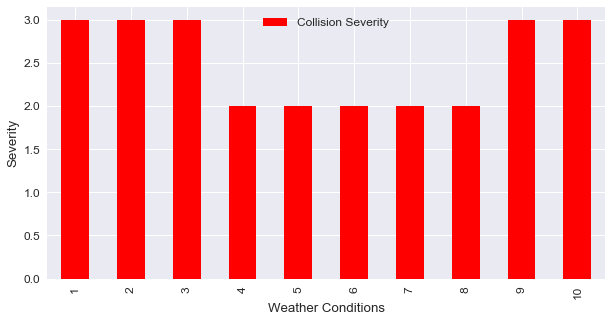

In [48]:
pivot.plot(kind='bar', color='red')
plt.ylabel("Severity")

Most of the severe collisons seems to happen when the whether conditions are
1. Fine without high winds
2. Raining without high winds
3. Snowing without high winds
4. Other
5. Unknown

In [49]:
accident_data['Junction Detail'].unique()

array([  1.,  12.,   6.,  10.,   9.,  nan,   3.,   8.,   2.])

In [50]:
#let's check the mean price per quality and plot it.
pivot = accident_data.pivot_table(index='Junction Detail', values='Collision Severity', aggfunc=np.median)
pivot

,Collision Severity
Junction Detail,
1.0,3
2.0,3
3.0,3
6.0,3
8.0,3
9.0,3
10.0,3
12.0,3


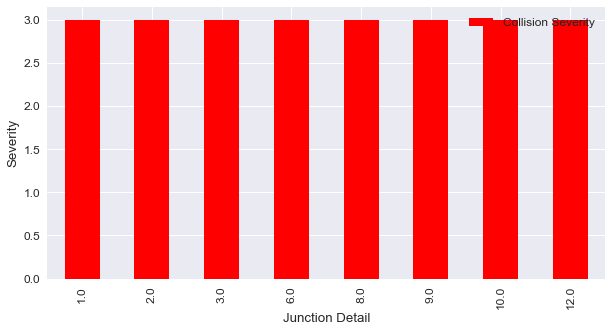

In [51]:
pivot.plot(kind='bar', color='red')
plt.ylabel("Severity")

In [52]:
accident_data['Junction Control'].unique()

array([  1.,   7.,   3.,  nan,   4.])

In [53]:
#let's check the mean price per quality and plot it.
pivot = accident_data.pivot_table(index='Junction Control', values='Collision Severity', aggfunc=np.median)
pivot

,Collision Severity
Junction Control,
1.0,3
3.0,3
4.0,3
7.0,3


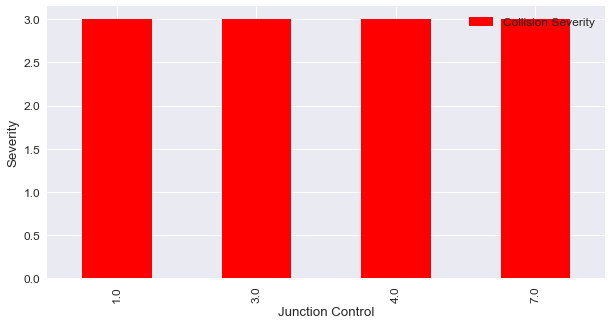

In [54]:
pivot.plot(kind='bar', color='red')
plt.ylabel("Severity")

In [55]:
#let's check the mean price per quality and plot it.
pivot = accident_data.pivot_table(index='Speed Limit', values='Collision Severity', aggfunc=np.median)
pivot

,Collision Severity
Speed Limit,
10,3
15,3
20,3
30,3
40,3
50,3
60,3
65,3
70,3


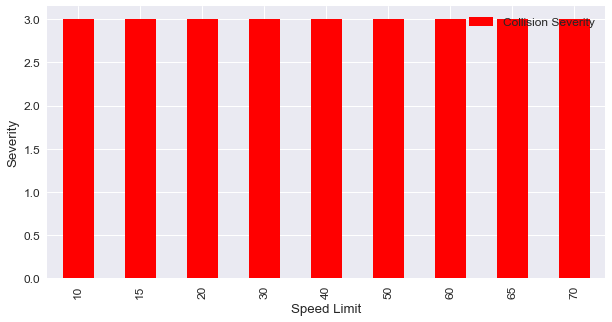

In [56]:
pivot.plot(kind='bar', color='red')
plt.ylabel("Severity")

In [57]:
#let's check the mean price per quality and plot it.
pivot = accident_data.pivot_table(index='Road Surface Conditions', values='Collision Severity', aggfunc=np.median)
pivot

,Collision Severity
Road Surface Conditions,
1.0,3
2.0,3
3.0,3
4.0,3
5.0,3
6.0,3
7.0,3
8.0,3
9.0,3


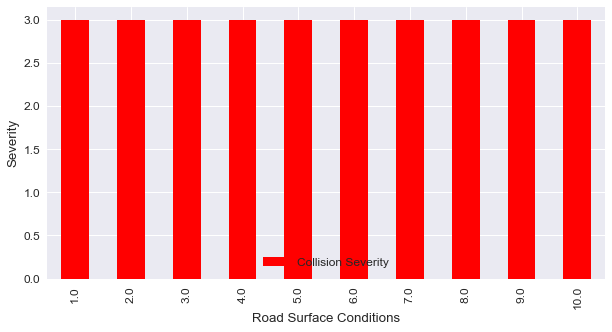

In [58]:
pivot.plot(kind='bar', color='red')
plt.ylabel("Severity")

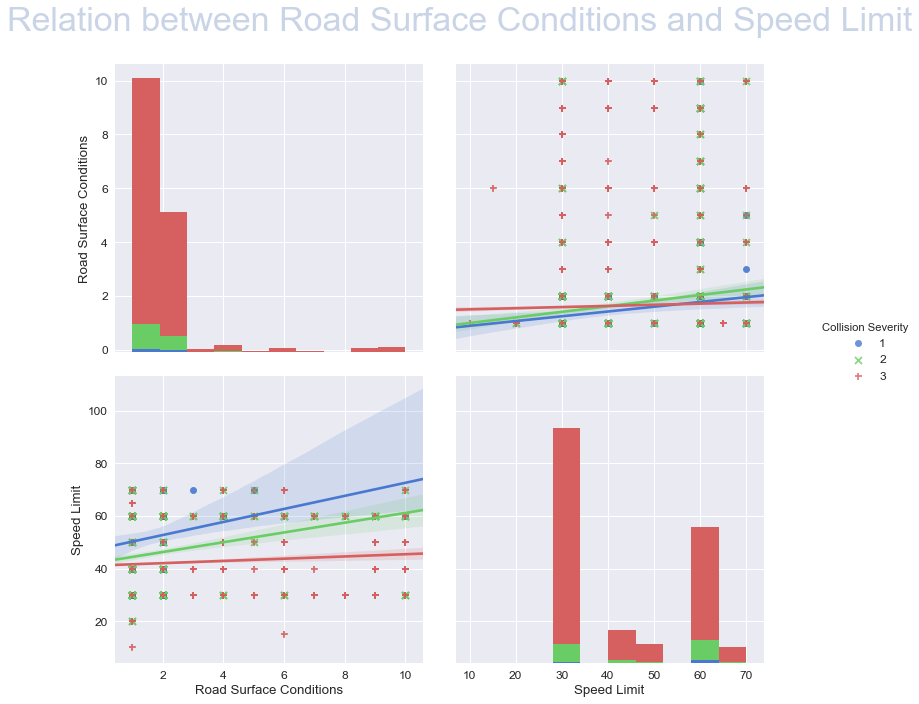

In [59]:
g = sns.pairplot(distData,hue="Collision Severity",palette="muted",size=5,
    vars=["Road Surface Conditions", "Speed Limit"],kind='reg',markers=['o','x','+'])

# To change the size of the scatterpoints in graph
g = g.map_offdiag(plt.scatter,  s=35,alpha=0.5)

# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Relation between Road Surface Conditions and Speed Limit',
    fontsize=34,color="b",alpha=0.3)

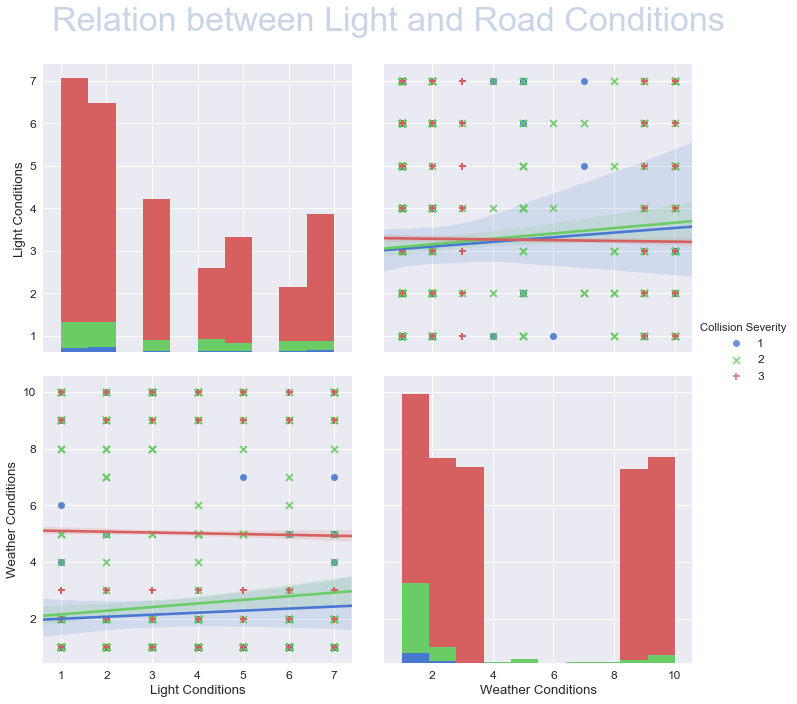

In [60]:
g = sns.pairplot(distData,hue="Collision Severity",palette="muted",size=5,
    vars=["Light Conditions", "Weather Conditions"],kind='reg',markers=['o','x','+'])

# To change the size of the scatterpoints in graph
g = g.map_offdiag(plt.scatter,  s=35,alpha=0.5)

# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Relation between Light and Road Conditions',
    fontsize=34,color="b",alpha=0.3)

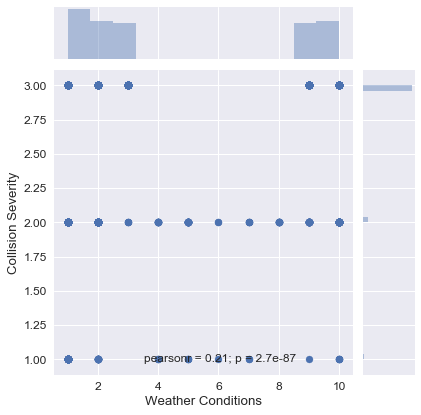

In [61]:
#Weather Conditions
sns.jointplot(x=accident_data['Weather Conditions'], y=accident_data['Collision Severity'])

## Categorical Data correlation

Moving forward, like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.
While using ANOVA, our hypothesis is as follows:
Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.

               features      pval
1  Weekday of Collision  0.000002
0         Policing Area       NaN


<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

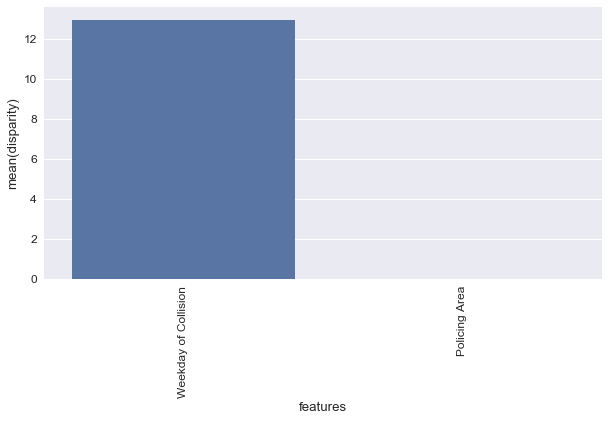

In [62]:
cat_data = accident_data.select_dtypes(exclude=[np.number])
cat = [f for f in accident_data.columns if accident_data.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['Collision Severity'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['Collision Severity'] = accident_data["Collision Severity"]
k = anova(cat_data) 
print k

k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

Here we see that among two categorical variables Weekday of the collision out to be the most important feature. It means that day of the week on which the accident occured influencing the severity of the accident. 

## Data Preprocessing

In this stage, we'll deal with outlier values, encode variables, impute missing values, and take every possible initiative which can remove inconsistencies from the data set.

#### Encoding Weekday of collision variable

In [63]:
accident_data["Weekday of Collision"] = accident_data["Weekday of Collision"].map({"MON": 1, "TUE": 2, "WED": 3, "THU": 4, "FRI": 5, "SAT": 6, "SUN": 7}).astype(int)
accident_data_test["Weekday of Collision"] = accident_data_test["Weekday of Collision"].map({"MON": 1, "TUE": 2, "WED": 3, "THU": 4, "FRI": 5, "SAT": 6, "SUN": 7}).astype(int)
train_data=accident_data
test_data=accident_data_test

In [64]:
# Verify the datatypes of the dataset
accident_data.dtypes

Collision Reference No.                     int64
Policing Area                              object
Collision Severity                          int64
Weekday of Collision                        int32
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [65]:
accident_data_test.dtypes

Collision Reference No.                     int64
Policing Area                              object
Collision Severity                          int64
Weekday of Collision                        int32
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [66]:
accident_data['Policing Area']=pd.get_dummies(accident_data['Policing Area'])

In [67]:
accident_data_test['Policing Area']=pd.get_dummies(accident_data_test['Policing Area'])

In [68]:
accident_data.columns

Index([u'Collision Reference No.', u'Policing Area', u'Collision Severity',
       u'Weekday of Collision', u'Day of Collision', u'Month of Collision',
       u'Hour of Collision (24 hour)', u'Carriageway Type', u'Speed Limit',
       u'Junction Detail', u'Junction Control',
       u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [69]:
accident_data_test.columns

Index([u'Collision Reference No.', u'Policing Area', u'Collision Severity',
       u'Weekday of Collision', u'Day of Collision', u'Month of Collision',
       u'Hour of Collision (24 hour)', u'Carriageway Type', u'Speed Limit',
       u'Junction Detail', u'Junction Control',
       u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [70]:
accident_data.dtypes

Collision Reference No.                     int64
Policing Area                               uint8
Collision Severity                          int64
Weekday of Collision                        int32
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [71]:
accident_data_test.dtypes

Collision Reference No.                     int64
Policing Area                               uint8
Collision Severity                          int64
Weekday of Collision                        int32
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [72]:
accident_data

,Collision Reference No.,Policing Area,Collision Severity,Weekday of Collision,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing  Human Control,Pedestrian Crossing  Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,3518,0,3,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,0,3,6,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,0,3,3,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,0,3,7,18,10,16.0,12,70,6.0,7.0,1.0,1.0,1,3,1.0,1.0
4,12416,0,3,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0
5,558,0,2,1,3,2,12.0,13,60,1.0,1.0,1.0,1.0,2,2,2.0,NaN
6,7372,1,2,1,26,1,16.0,13,40,6.0,7.0,1.0,1.0,1,1,2.0,5.0
7,11825,0,3,6,24,10,11.0,13,60,10.0,7.0,1.0,1.0,1,10,2.0,1.0
8,7656,0,3,2,10,2,15.0,1,30,1.0,1.0,1.0,1.0,1,3,1.0,NaN
9,5582,0,3,5,5,12,8.0,13,30,1.0,1.0,1.0,2.0,7,10,1.0,1.0


### Check for missing column names in test

In [73]:
accident_data.columns

Index([u'Collision Reference No.', u'Policing Area', u'Collision Severity',
       u'Weekday of Collision', u'Day of Collision', u'Month of Collision',
       u'Hour of Collision (24 hour)', u'Carriageway Type', u'Speed Limit',
       u'Junction Detail', u'Junction Control',
       u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [74]:
accident_data_test.columns

Index([u'Collision Reference No.', u'Policing Area', u'Collision Severity',
       u'Weekday of Collision', u'Day of Collision', u'Month of Collision',
       u'Hour of Collision (24 hour)', u'Carriageway Type', u'Speed Limit',
       u'Junction Detail', u'Junction Control',
       u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [75]:
accident_data_test.dtypes

Collision Reference No.                     int64
Policing Area                               uint8
Collision Severity                          int64
Weekday of Collision                        int32
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [76]:
def getMissing(a, b):
    """ return the intersection of two lists """
    return list(set(a) - set(b))

miss_cols=getMissing(accident_data.columns,accident_data_test.columns)
print miss_cols

[]


In [77]:
accident_data.dropna(inplace=True)

In [78]:
accident_data_test.dropna(inplace=True)

## Machine learning algorithms

In [79]:
# Setting a random seed will guarantee we get the same results
# every time we run our training and testing.
random.seed(123)

### Data preparation for machine learning algorithms

In [80]:
x_train=accident_data.ix[:,accident_data.columns != 'Collision Severity']
x_train.drop('Collision Reference No.',inplace=True,axis=1)
x_train.columns

Index([u'Policing Area', u'Weekday of Collision', u'Day of Collision',
       u'Month of Collision', u'Hour of Collision (24 hour)',
       u'Carriageway Type', u'Speed Limit', u'Junction Detail',
       u'Junction Control', u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [81]:
y_train = accident_data['Collision Severity']
y_train

0       3
1       3
2       3
3       3
4       3
6       2
7       3
9       3
10      3
11      2
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
30      3
33      3
       ..
8527    2
8529    2
8530    2
8531    3
8533    3
8534    3
8535    3
8536    3
8537    2
8538    3
8539    3
8540    3
8541    3
8543    3
8544    3
8545    3
8546    3
8547    3
8548    3
8550    3
8551    3
8552    3
8553    3
8554    3
8555    3
8556    3
8558    3
8559    3
8560    3
8561    3
Name: Collision Severity, Length: 6969, dtype: int64

In [82]:
x_test=accident_data_test.ix[:,accident_data_test.columns != 'Collision Severity']
x_test.drop('Collision Reference No.',inplace=True,axis=1)
x_test.columns

Index([u'Policing Area', u'Weekday of Collision', u'Day of Collision',
       u'Month of Collision', u'Hour of Collision (24 hour)',
       u'Carriageway Type', u'Speed Limit', u'Junction Detail',
       u'Junction Control', u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [83]:
y_test = accident_data_test['Collision Severity']
y_test

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      1
11      3
14      3
16      3
17      3
20      3
21      2
22      2
24      3
25      3
26      3
27      3
28      3
30      3
31      3
32      2
33      3
34      3
35      3
36      3
       ..
1799    3
1800    2
1802    3
1803    3
1804    3
1806    3
1807    3
1809    3
1810    3
1811    3
1813    3
1814    3
1815    3
1816    3
1817    3
1818    3
1819    3
1820    3
1821    3
1822    3
1824    3
1825    3
1826    3
1827    3
1828    3
1830    3
1831    3
1832    3
1833    3
1834    3
Name: Collision Severity, Length: 1501, dtype: int64

In [84]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

In [85]:
x_train.dtypes

Policing Area                               uint8
Weekday of Collision                        int32
Day of Collision                            int64
Month of Collision                          int64
Hour of Collision (24 hour)               float64
Carriageway Type                            int64
Speed Limit                                 int64
Junction Detail                           float64
Junction Control                          float64
Pedestrian Crossing  Human Control       float64
Pedestrian Crossing  Physical Control    float64
Light Conditions                            int64
Weather Conditions                          int64
Road Surface Conditions                   float64
Special Conditions at Site                float64
dtype: object

In [86]:
type(y_train)

pandas.core.series.Series

In [87]:
# Logistic Regression ‐ Random Search for Hyperparameters
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],'class_weight': [None, 'balanced'],'C': np.logspace(-20, 20, 10000),
'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,n_jobs=-1,param_distributions=param_dist,n_iter=n_iter_search)

start = time.time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 110.10 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.892 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 2.3417307222835191e-05, 'intercept_scaling': 6.078247467925152e+17, 'class_weight': 'balanced'}

Model with rank: 1
Mean validation score: 0.892 (std: 0.000)
Parameters: {'penalty': 'l2', 'C': 4.0997868312290476e-13, 'intercept_scaling': 53873245210194.109, 'class_weight': 'balanced'}

Model with rank: 1
Mean validation score: 0.892 (std: 0.000)
Parameters: {'penalty': 'l2', 'C': 22234875573.150585, 'intercept_scaling': 8446808.9081768449, 'class_weight': 'balanced'}

Model with rank: 1
Mean validation score: 0.892 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 0.00034486868843098108, 'intercept_scaling': 0.039981601483542142, 'class_weight': 'balanced'}

Model with rank: 1
Mean validation score: 0.892 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 3660634392028509.0, 'intercept_scaling': 8597.9207814081965, 'clas

In [88]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    if(isinstance(algo,(RandomForestClassifier))):
        model=algo.fit(X_train,y_train,sample_weight = np.array([3 if i == 1 else 1 for i in y_train]))
    else:
        model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,
                          RandomForestClassifier,GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2)
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs,model

### Logistic regression with tuned parameters

In [89]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log,model = fit_ml_algo(LogisticRegression(class_weight='balanced',C=2.3325812680793149e+18,penalty='l2',n_jobs=-1),x_train,y_train,x_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10‐Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 86.01
Accuracy CV 10‐Fold: 85.69
Running Time: 0:00:10.500000


In [90]:
print metrics.classification_report(y_train, train_pred_log)

             precision    recall  f1-score   support

          1       0.07      0.26      0.11        94
          2       0.27      0.05      0.09       657
          3       0.91      0.95      0.93      6218

avg / total       0.84      0.86      0.84      6969



[[  24    4   66]
 [ 101   34  522]
 [ 217   87 5914]]


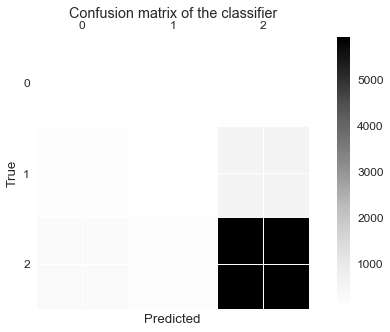

In [91]:
labels = ['0', '1','2']
cm = confusion_matrix(y_train, train_pred_log)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [92]:
acc_log_test_raw= metrics.accuracy_score(y_test,test_pred_log)
acc_log_test_raw

0.86009327115256495

In [93]:
print metrics.classification_report(y_test, test_pred_log)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.21      0.04      0.07       138
          3       0.91      0.95      0.93      1353

avg / total       0.84      0.86      0.84      1501



[[   0    1    9]
 [  15    6  117]
 [  47   21 1285]]


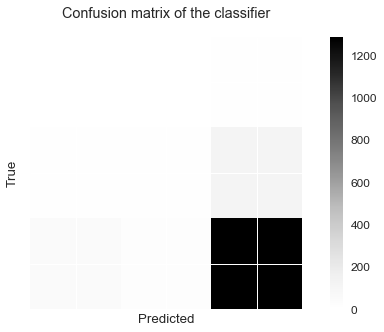

In [94]:
cm = confusion_matrix(y_test, test_pred_log)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [95]:
# The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming_train_log_raw= metrics.hamming_loss(y_test,test_pred_log)
hamming_train_log_raw

0.13990672884743505

In [96]:
# The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming_test_lolg_raw= metrics.hamming_loss(y_train,train_pred_log)
hamming_test_lolg_raw

0.14306213230018655

In [97]:
train_kappa_log_raw= metrics.cohen_kappa_score(y_train,train_pred_log)
print train_kappa_log_raw

0.134005388339


In [98]:
test_kappa_log_raw= metrics.cohen_kappa_score(y_test,test_pred_log)
print test_kappa_log_raw

0.0713658619938


In [99]:
set(y_train)

{1, 2, 3}

In [100]:
model

LogisticRegression(C=2.33258126808e+18, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### K-Nearest Neighbors

In [101]:
# k‐Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn,knn_model_raw = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,n_jobs =-1),
                                                                            x_train,y_train,x_test,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10‐Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 86.61
Accuracy CV 10‐Fold: 86.88
Running Time: 0:00:08.739000


In [102]:
acc_knn_test_raw= metrics.accuracy_score(y_test,test_pred_knn)
acc_knn_test_raw

0.86608927381745504

In [103]:
print metrics.classification_report(y_train, train_pred_knn)

             precision    recall  f1-score   support

          1       0.10      0.07      0.09        94
          2       0.24      0.09      0.14       657
          3       0.90      0.96      0.93      6218

avg / total       0.83      0.87      0.84      6969



[[   7    9   78]
 [  16   62  579]
 [  46  186 5986]]


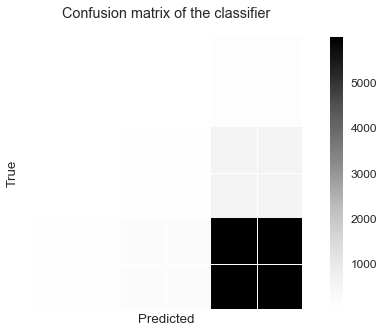

In [104]:
cm = confusion_matrix(y_train, train_pred_knn)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [105]:
print metrics.classification_report(y_test, test_pred_knn)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.16      0.07      0.10       138
          3       0.91      0.95      0.93      1353

avg / total       0.83      0.87      0.85      1501



[[   0    1    9]
 [   3   10  125]
 [  11   52 1290]]


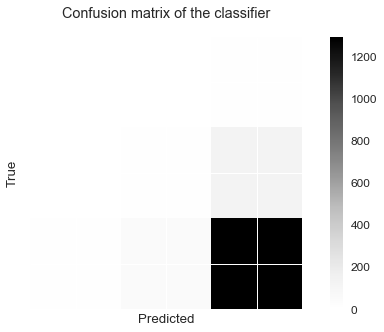

In [106]:
cm = confusion_matrix(y_test, test_pred_knn)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [107]:
print metrics.accuracy_score(y_test,test_pred_log)

0.860093271153


In [108]:
kappa_train_knn_raw= metrics.cohen_kappa_score(y_train,train_pred_knn)
print kappa_train_knn_raw

0.101021924924


In [109]:
kappa_test_knn_raw = metrics.cohen_kappa_score(y_test,test_pred_knn)
print kappa_test_knn_raw

0.0497456652861


In [110]:
hamming_train_knn_raw=metrics.hamming_loss(y_train,train_pred_knn)
hamming_train_knn_raw

0.13115224565934855

In [111]:
hamming_test_knn_raw=metrics.hamming_loss(y_test,test_pred_knn)
hamming_test_knn_raw

0.13391072618254496

In [112]:
knn_model_raw

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

### Gaussian naive bayes

In [113]:
#Gaussian naive bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau,gau_model_raw =fit_ml_algo(GaussianNB(),x_train,y_train,x_test,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10‐Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 42.57
Accuracy CV 10‐Fold: 35.87
Running Time: 0:00:07.370000


In [114]:
acc_gaussian_test_raw= metrics.accuracy_score(y_test,test_pred_gaussian)
acc_gaussian_test_raw

0.42571618920719523

In [115]:
print metrics.classification_report(y_train, train_pred_gaussian)

             precision    recall  f1-score   support

          1       0.02      0.81      0.04        94
          2       0.09      0.11      0.10       657
          3       0.94      0.38      0.54      6218

avg / total       0.85      0.36      0.49      6969



[[  76    7   11]
 [ 449   73  135]
 [3164  703 2351]]


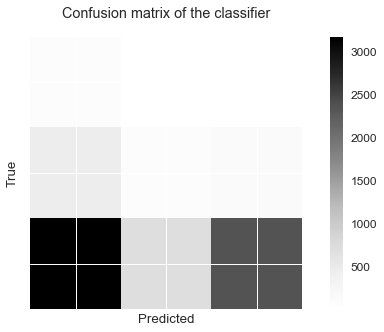

In [116]:
cm = confusion_matrix(y_train, train_pred_gaussian)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [117]:
print metrics.classification_report(y_test, test_pred_gaussian)

             precision    recall  f1-score   support

          1       0.01      0.80      0.02        10
          2       0.10      0.02      0.04       138
          3       0.93      0.46      0.62      1353

avg / total       0.85      0.43      0.56      1501



[[  8   0   2]
 [ 92   3  43]
 [697  28 628]]


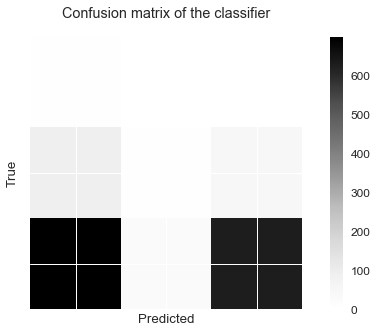

In [118]:
cm = confusion_matrix(y_test, test_pred_gaussian)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [119]:
print metrics.accuracy_score(y_test,test_pred_gaussian)

0.425716189207


In [120]:
hamming_train_gaussian_raw=metrics.hamming_loss(y_train,train_pred_gaussian)
hamming_train_gaussian_raw

0.6412684746735543

In [121]:
hamming_test_gaussian_raw=metrics.hamming_loss(y_test,test_pred_gaussian)
hamming_test_gaussian_raw

0.57428381079280477

In [122]:
kappa_train_gaussian_raw=metrics.cohen_kappa_score(y_train,train_pred_gaussian)
kappa_train_gaussian_raw

0.032162079500629881

In [123]:
kappa_test_gaussian_raw=metrics.cohen_kappa_score(y_test,test_pred_gaussian)
kappa_test_gaussian_raw

0.02730599676435741

In [124]:
gau_model_raw

GaussianNB(priors=None)

## SVC

In [125]:
#Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, probs_svc,svc_model_raw = fit_ml_algo(LinearSVC(class_weight='balanced'),x_train,y_train,x_test,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10‐Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 90.14
Accuracy CV 10‐Fold: 88.65
Running Time: 0:00:21.117000


In [201]:
print metrics.classification_report(y_train, train_pred_svc)
#print acc_linear_train_raw

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        94
          2       0.24      0.03      0.05       657
          3       0.89      0.99      0.94      6218

avg / total       0.82      0.89      0.84      6969



[[   0    2   92]
 [   0   20  637]
 [   0   60 6158]]


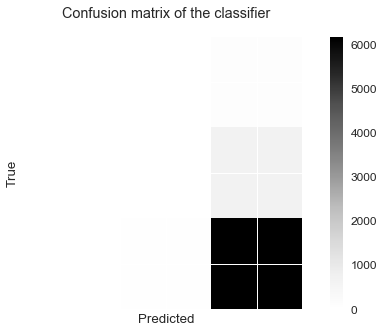

In [127]:
cm = confusion_matrix(y_train, train_pred_svc)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [206]:
print metrics.classification_report(y_test, test_pred_svc)
#print acc_linear_test_raw

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.00      0.00      0.00       138
          3       0.90      1.00      0.95      1353

avg / total       0.81      0.90      0.85      1501



[[   0    0   10]
 [   0    0  138]
 [   0    0 1353]]


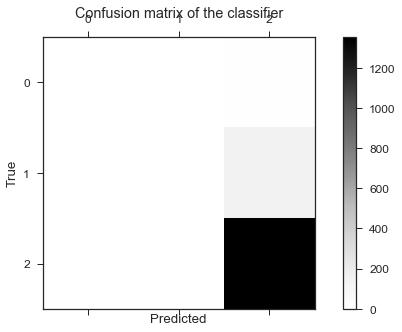

In [207]:
cm = confusion_matrix(y_test, test_pred_svc)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [208]:
acc_linear_test_raw= metrics.accuracy_score(y_test,test_pred_svc)
print acc_linear_test_raw

0.901399067288


In [131]:
hamming_train_svc_raw=metrics.hamming_loss(y_train,train_pred_svc)
hamming_train_svc_raw

0.11350265461328742

In [132]:
hamming_test_svc_raw=metrics.hamming_loss(y_test,test_pred_svc)
hamming_test_svc_raw

0.098600932711525646

In [133]:
kappa_train_svc_raw=metrics.cohen_kappa_score(y_train,train_pred_svc)
kappa_train_svc_raw

0.031151263831741494

In [134]:
kappa_test_svc_raw=metrics.cohen_kappa_score(y_test,test_pred_svc)
kappa_test_svc_raw

0.0

In [135]:
svc_model_raw

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Stochastic Gradient Descent

In [136]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _,sgd_model_raw = fit_ml_algo(SGDClassifier(n_jobs = -1,class_weight='balanced',loss='hinge'),x_train,y_train,x_test,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10‐Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 16.46
Accuracy CV 10‐Fold: 65.79
Running Time: 0:00:09.135000


In [137]:
print metrics.classification_report(y_train, train_pred_sgd)

             precision    recall  f1-score   support

          1       0.02      0.30      0.04        94
          2       0.15      0.23      0.18       657
          3       0.92      0.71      0.80      6218

avg / total       0.84      0.66      0.73      6969



In [138]:
acc_sgd_test_raw= metrics.accuracy_score(y_test,test_pred_sgd)
print acc_sgd_test_raw

0.164556962025


[[  28   27   39]
 [ 168  151  338]
 [ 987  825 4406]]


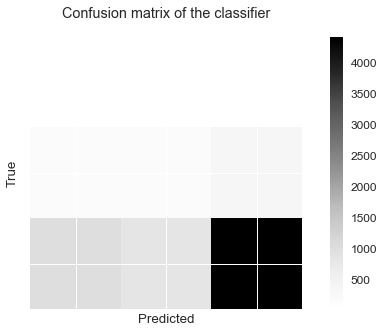

In [139]:
cm = confusion_matrix(y_train, train_pred_sgd)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [140]:
print metrics.classification_report(y_test, test_pred_sgd)

             precision    recall  f1-score   support

          1       0.01      1.00      0.02        10
          2       0.00      0.00      0.00       138
          3       0.96      0.18      0.30      1353

avg / total       0.86      0.16      0.27      1501



[[  10    0    0]
 [ 128    0   10]
 [1116    0  237]]


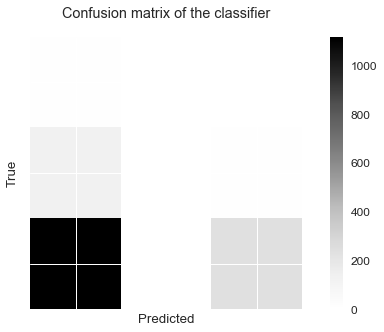

In [141]:
cm = confusion_matrix(y_test, test_pred_sgd)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [142]:
hamming_train_sgd_raw=metrics.hamming_loss(y_train,train_pred_sgd)
hamming_train_sgd_raw

0.34208638255129858

In [143]:
hamming_test_sgd_raw=metrics.hamming_loss(y_test,test_pred_sgd)
hamming_test_sgd_raw

0.83544303797468356

In [144]:
kappa_train_sgd_raw=metrics.cohen_kappa_score(y_train,train_pred_sgd)
kappa_train_sgd_raw

0.079862123004011853

In [145]:
kappa_test_sgd_raw=metrics.cohen_kappa_score(y_test,test_pred_sgd)
kappa_test_sgd_raw

0.012598425196850394

In [146]:
sgd_model_raw

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### Decision Tree

In [147]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt,dt_model_raw = fit_ml_algo(DecisionTreeClassifier(class_weight='balanced'),x_train,y_train,x_test,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10‐Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 86.08
Accuracy CV 10‐Fold: 85.16
Running Time: 0:00:09.042000


In [148]:
print metrics.classification_report(y_train, train_pred_dt)

             precision    recall  f1-score   support

          1       0.04      0.05      0.05        94
          2       0.31      0.30      0.31       657
          3       0.92      0.92      0.92      6218

avg / total       0.85      0.85      0.85      6969



In [149]:
acc_dt_test_raw= metrics.accuracy_score(y_test,test_pred_dt)
print acc_dt_test_raw

0.860759493671


[[   5   31   58]
 [  48  200  409]
 [  70  418 5730]]


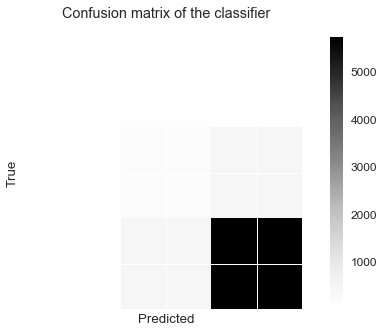

In [150]:
cm = confusion_matrix(y_train, train_pred_dt)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [151]:
print metrics.classification_report(y_test, test_pred_dt)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.32      0.36      0.34       138
          3       0.94      0.92      0.93      1353

avg / total       0.87      0.86      0.87      1501



[[   0    4    6]
 [  11   49   78]
 [  10  100 1243]]


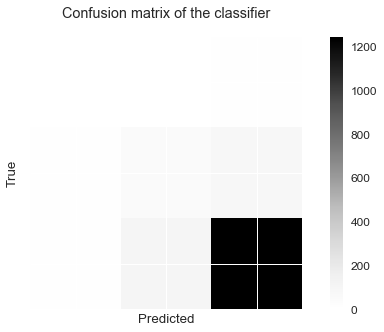

In [152]:
cm = confusion_matrix(y_test, test_pred_dt)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [153]:
hamming_train_dt_raw=metrics.hamming_loss(y_train,train_pred_dt)
hamming_train_dt_raw

0.14837135887501793

In [154]:
hamming_test_dt_raw=metrics.hamming_loss(y_test,test_pred_dt)
hamming_test_dt_raw

0.13924050632911392

In [155]:
kappa_train_dt_raw=metrics.cohen_kappa_score(y_train,train_pred_dt)
kappa_train_dt_raw

0.24907243181055549

In [156]:
kappa_test_dt_raw=metrics.cohen_kappa_score(y_test,test_pred_dt)
kappa_test_dt_raw

0.28088968150997373

In [157]:
dt_model_raw

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Gradient Boosing Trees

In [158]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt,gbt_model_raw = fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,x_test,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10‐Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 91.01
Accuracy CV 10‐Fold: 89.83
Running Time: 0:00:18.760000


In [159]:
acc_gbt_test_raw= metrics.accuracy_score(y_test,test_pred_gbt)
acc_gbt_test_raw

0.91005996002664891

In [160]:
print metrics.classification_report(y_train, train_pred_gbt)

             precision    recall  f1-score   support

          1       0.33      0.01      0.02        94
          2       0.56      0.14      0.22       657
          3       0.91      0.99      0.95      6218

avg / total       0.87      0.90      0.87      6969



[[   1   22   71]
 [   2   92  563]
 [   0   51 6167]]


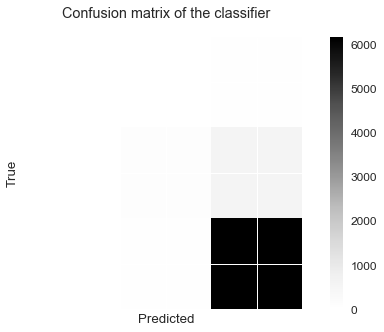

In [161]:
cm = confusion_matrix(y_train, train_pred_gbt)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [162]:
print metrics.classification_report(y_test, test_pred_gbt)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.64      0.18      0.28       138
          3       0.92      0.99      0.95      1353

avg / total       0.89      0.91      0.89      1501



[[   0    2    8]
 [   2   25  111]
 [   0   12 1341]]


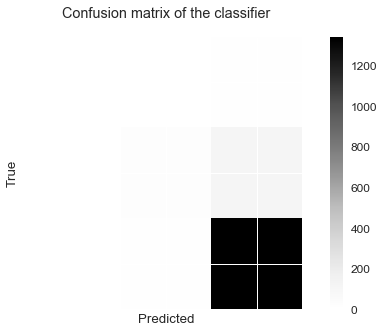

In [163]:
cm = confusion_matrix(y_test, test_pred_gbt)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [164]:
hamming_train_gbt_raw=metrics.hamming_loss(y_train,train_pred_gbt)
hamming_train_gbt_raw

0.10173626058257999

In [165]:
hamming_test_gbt_raw=metrics.hamming_loss(y_test,test_pred_gbt)
hamming_test_gbt_raw

0.089940039973351094

In [166]:
kappa_train_gbt_raw=metrics.cohen_kappa_score(y_train,train_pred_gbt)
kappa_train_gbt_raw

0.19914157288510081

In [167]:
kappa_test_gbt_raw=metrics.cohen_kappa_score(y_test,test_pred_gbt)
kappa_test_gbt_raw

0.25561771955668056

In [168]:
gbt_model_raw

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Random Forest

In [169]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10,min_samples_leaf=2,min_samples_split=17,criterion='gini',max_features=8,class_weight='balanced')
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf,rf_model_raw = fit_ml_algo(rfc,x_train,y_train,x_test,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10‐Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 82.48
Accuracy CV 10‐Fold: 83.07
Running Time: 0:00:08.685000


In [170]:
acc_rf_test_raw= metrics.accuracy_score(y_test,test_pred_rf)
acc_rf_test_raw

0.82478347768154558

In [171]:
print metrics.classification_report(y_train, train_pred_rf)

             precision    recall  f1-score   support

          1       0.05      0.06      0.06        94
          2       0.32      0.54      0.40       657
          3       0.95      0.87      0.91      6218

avg / total       0.88      0.83      0.85      6969



[[   6   53   35]
 [  33  355  269]
 [  75  715 5428]]


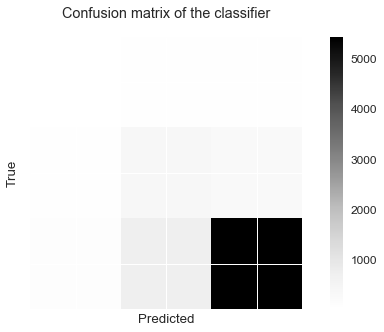

In [172]:
cm = confusion_matrix(y_train, train_pred_rf)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [173]:
print metrics.classification_report(y_test, test_pred_rf)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.29      0.48      0.36       138
          3       0.94      0.87      0.90      1353

avg / total       0.88      0.82      0.85      1501



[[   0    5    5]
 [   7   66   65]
 [  27  154 1172]]


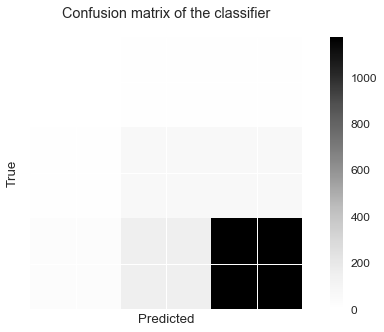

In [174]:
cm = confusion_matrix(y_test, test_pred_rf)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [175]:
hamming_train_rf_raw=metrics.hamming_loss(y_train,train_pred_rf)
hamming_train_rf_raw

0.16932127995408236

In [176]:
hamming_test_rf_raw=metrics.hamming_loss(y_test,test_pred_rf)
hamming_test_rf_raw

0.17521652231845436

In [177]:
kappa_train_rf_raw=metrics.cohen_kappa_score(y_train,train_pred_rf)
kappa_train_rf_raw

0.32466815331179844

In [178]:
kappa_test_rf_raw=metrics.cohen_kappa_score(y_test,test_pred_rf)
kappa_test_rf_raw

0.27055812707299709

In [179]:
rf_model_raw

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=17, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Multi-layer Perceptron classifier

In [180]:
# Multi-layer Perceptron classifier -- Weekend
start_time = time.time()
mlp = MLPClassifier()
train_pred_mlp, test_pred_mlp, acc_mlp, acc_cv_mlp, probs_mlp,mlp_model_raw = fit_ml_algo(mlp,x_train,y_train,x_test,10)
svr_time = (time.time() - start_time)
print("Accuracy: %s" % acc_mlp)
print("Accuracy CV 10‐Fold: %s" % acc_cv_mlp)
print("Running Time: %s" % datetime.timedelta(seconds=svr_time))

Accuracy: 90.01
Accuracy CV 10‐Fold: 89.17
Running Time: 0:00:13.193000


In [184]:
acc_mlp_train_raw= metrics.accuracy_score(y_train,train_pred_mlp)
acc_mlp_train_raw

0.89166307935141342

[[   0    4   90]
 [   0   13  644]
 [   0   17 6201]]


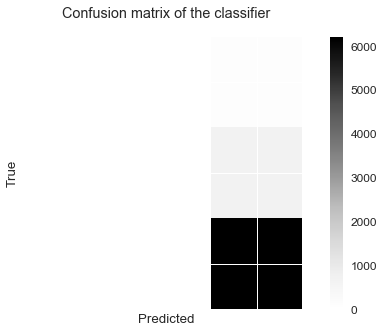

In [185]:
cm = confusion_matrix(y_train, train_pred_mlp)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [186]:
acc_mlp_test_raw= metrics.accuracy_score(y_test,test_pred_mlp)
acc_mlp_test_raw

0.90006662225183209

In [187]:
print metrics.classification_report(y_test, test_pred_mlp)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.33      0.01      0.03       138
          3       0.90      1.00      0.95      1353

avg / total       0.84      0.90      0.86      1501



In [188]:
hamming_train_mlp_raw=metrics.hamming_loss(y_train,train_pred_mlp)
hamming_train_mlp_raw

0.1083369206485866

In [189]:
hamming_test_mlp_raw=metrics.hamming_loss(y_test,test_pred_mlp)
hamming_test_mlp_raw

0.099933377748167893

In [190]:
kappa_train_dt_mlp=metrics.cohen_kappa_score(y_train,train_pred_mlp)
kappa_train_dt_mlp

0.029726010194377706

In [191]:
kappa_test_dt_mlp=metrics.cohen_kappa_score(y_test,test_pred_mlp)
kappa_test_dt_mlp

0.018689144779853395

### Model metrics on raw data

In [192]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn,
acc_log,
acc_rf,
acc_gaussian,
acc_sgd,
acc_linear_svc,
acc_dt,
acc_gbt,
acc_mlp
]})

In [193]:
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,91.01
5,Linear SVC,90.14
8,Multi-layer Perceptron classifier,90.01
0,KNN,86.61
6,Decision Tree,86.08
1,Logistic Regression,86.01
2,Random Forest,82.48
3,Naive Bayes,42.57
4,Stochastic Gradient Decent,16.46


In [194]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_cv_knn,
acc_cv_log,
acc_cv_rf,
acc_cv_gaussian,
acc_cv_sgd,
acc_cv_linear_svc,
acc_cv_dt,
acc_cv_gbt,
acc_cv_mlp
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,89.83
8,Multi-layer Perceptron classifier,89.17
5,Linear SVC,88.65
0,KNN,86.88
1,Logistic Regression,85.69
6,Decision Tree,85.16
2,Random Forest,83.07
4,Stochastic Gradient Decent,65.79
3,Naive Bayes,35.87


In [210]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_test_raw,
acc_log_test_raw,
acc_rf_test_raw,
acc_gaussian_test_raw,
acc_sgd_test_raw,
acc_linear_test_raw,
acc_dt_test_raw,
acc_gbt_test_raw,
acc_mlp_test_raw
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,0.910060
5,Linear SVC,0.901399
8,Multi-layer Perceptron classifier,0.900067
0,KNN,0.866089
6,Decision Tree,0.860759
1,Logistic Regression,0.860093
2,Random Forest,0.824783
3,Naive Bayes,0.425716
4,Stochastic Gradient Decent,0.164557


In [211]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Difference in hamming error': [
hamming_train_knn_raw-hamming_test_knn_raw,
hamming_train_knn_raw-hamming_test_knn_raw,
hamming_train_rf_raw-hamming_test_rf_raw,
hamming_train_gaussian_raw-hamming_test_gaussian_raw,
hamming_train_sgd_raw-hamming_test_sgd_raw,
hamming_train_svc_raw-hamming_test_svc_raw,
hamming_train_dt_raw-hamming_test_dt_raw,
hamming_train_gbt_raw-hamming_test_gbt_raw,
hamming_train_mlp_raw-hamming_test_mlp_raw
]})
models.sort_values(by='Difference in hamming error', ascending=False)

,Difference in hamming error,Model
3,0.066985,Naive Bayes
5,0.014902,Linear SVC
7,0.011796,Gradient Boosting Trees
6,0.009131,Decision Tree
8,0.008404,Multi-layer Perceptron classifier
0,-0.002758,KNN
1,-0.002758,Logistic Regression
2,-0.005895,Random Forest
4,-0.493357,Stochastic Gradient Decent


In [212]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Hamming error on train': [
hamming_train_knn_raw,
hamming_train_knn_raw,
hamming_train_rf_raw,
hamming_train_gaussian_raw,
hamming_train_sgd_raw,
hamming_train_svc_raw,
hamming_train_dt_raw,
hamming_train_gbt_raw,
hamming_train_mlp_raw
],
'Hamming error on test': [
hamming_test_knn_raw,
hamming_test_knn_raw,
hamming_test_rf_raw,
hamming_test_gaussian_raw,
hamming_test_sgd_raw,
hamming_test_svc_raw,
hamming_test_dt_raw,
hamming_test_gbt_raw,
hamming_test_mlp_raw
]})


In [213]:
models.columns

Index([u'Hamming error on test', u'Hamming error on train', u'Model'], dtype='object')

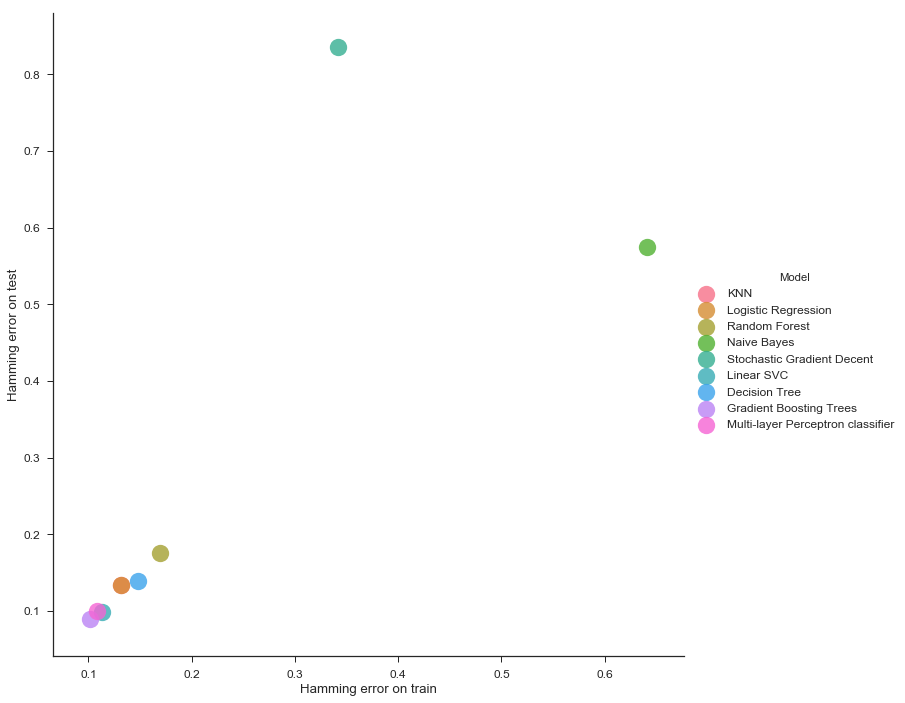

In [214]:
sns.set_style('ticks')
fig=sns.lmplot('Hamming error on train', # Horizontal axis
           'Hamming error on test', # Vertical axis
           data=models, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Model", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 300},size=10) # S marker size

plt.show()

### Feature Engineering and selection

In [215]:
# Calculating PCA for dataset, and graphing the Variance for each feature

In [216]:
std_scale = preprocessing.StandardScaler().fit(accident_data.drop('Collision Severity', axis=1))
X = std_scale.transform(accident_data.drop('Collision Severity', axis=1))
pca1 = PCA(n_components=len(accident_data.columns)-1)
fit1 = pca1.fit(X)

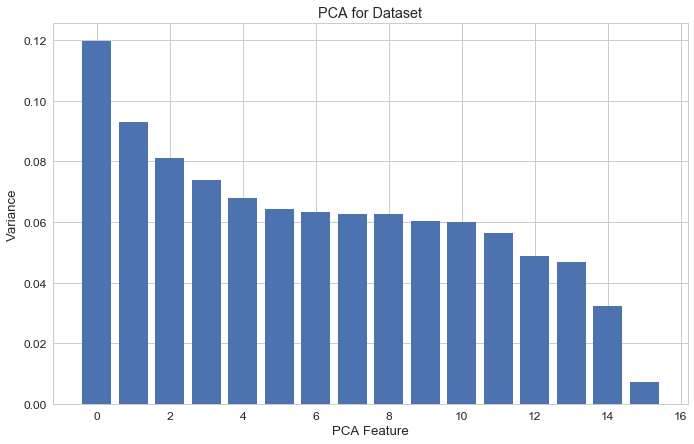

In [217]:
# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

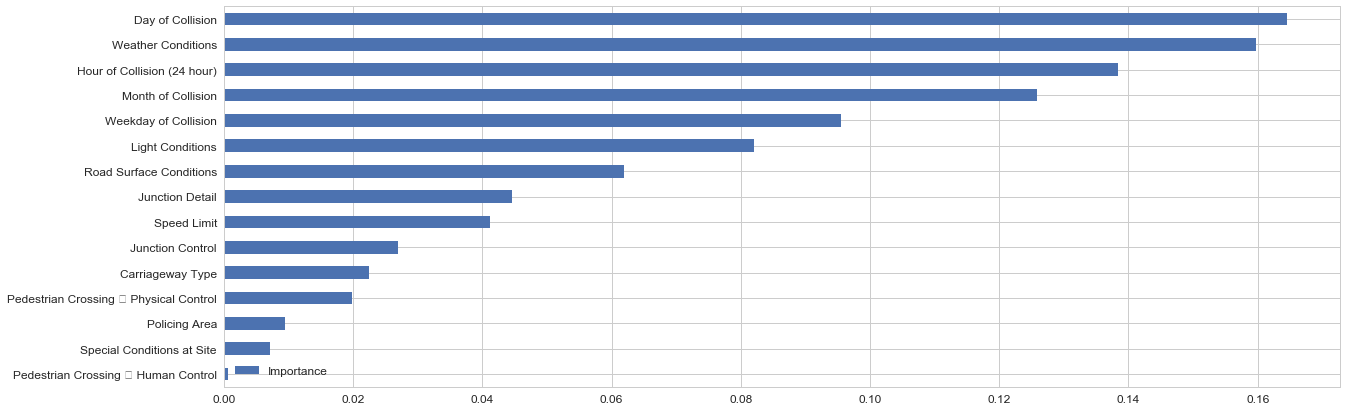

In [218]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(accident_data.drop(['Collision Severity','Collision Reference No.'], axis=1), accident_data['Collision Severity'])
plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=accident_data.drop(['Collision Severity','Collision Reference No.'], axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

Feature Ranking For Non‐Discretised: [ 5  1  4 15 10 11  3 13  7  6  1 12 14  9  8  2]
Optimal number of features : 2


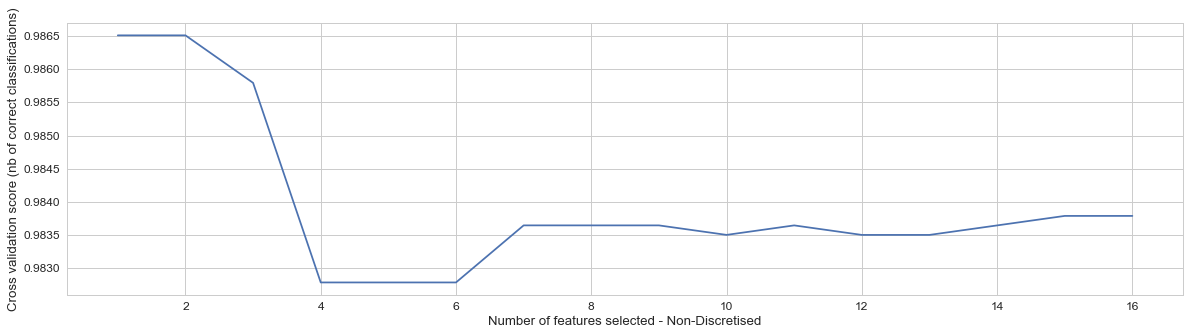

In [219]:
# Calculating RFE for non‐discretised dataset, and graphing the Importance for each feature, per dataset
accident_data_rfe=accident_data.drop('Collision Reference No.', axis=1)
selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(accident_data_rfe.values, accident_data_rfe['Collision Severity'].values)
print("Feature Ranking For Non‐Discretised: %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_)
# Plot number of features VS. cross‐validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5))
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_);


In [220]:
# features selected from RFE
print np.insert(selector1.support_, 0, True)

print len(accident_data.columns)

#accident_data = accident_data[accident_data.columns[np.insert(selector1.support_, 0, True)]]

[ True False  True False False False False False False False False  True
 False False False False False]
17


In [221]:
print accident_data.columns

Index([u'Collision Reference No.', u'Policing Area', u'Collision Severity',
       u'Weekday of Collision', u'Day of Collision', u'Month of Collision',
       u'Hour of Collision (24 hour)', u'Carriageway Type', u'Speed Limit',
       u'Junction Detail', u'Junction Control',
       u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Light Conditions',
       u'Weather Conditions', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')


## Try with oversampling

In [222]:
# 'SMOTE'
smote = SMOTE(kind='regular')
smox, smoy = smote.fit_sample(x_train, y_train)

In [223]:
smox.shape

(18654L, 15L)

In [224]:
smoy.shape

(18654L,)

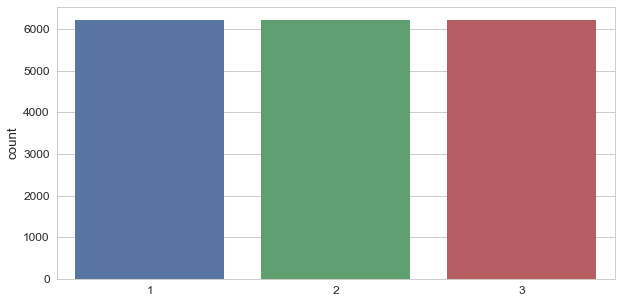

In [225]:
sns.countplot(smoy)

In [226]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],'class_weight': [None, 'balanced'],'C': np.logspace(-20, 20, 10000),
'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,n_jobs=-1,param_distributions=param_dist,n_iter=n_iter_search)

start = time.time()
random_search.fit(smox, smoy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 429.74 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.544 (std: 0.006)
Parameters: {'penalty': 'l1', 'C': 321033.72283996991, 'intercept_scaling': 0.0025219714975424439, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.544 (std: 0.007)
Parameters: {'penalty': 'l1', 'C': 4.0175417261727236e+19, 'intercept_scaling': 14009.242128205684, 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.542 (std: 0.007)
Parameters: {'penalty': 'l1', 'C': 218491196718049.06, 'intercept_scaling': 15668214264.87632, 'class_weight': 'balanced'}

Model with rank: 4
Mean validation score: 0.542 (std: 0.006)
Parameters: {'penalty': 'l1', 'C': 10932106.914636599, 'intercept_scaling': 4048188493154.541, 'class_weight': None}

Model with rank: 5
Mean validation score: 0.542 (std: 0.006)
Parameters: {'penalty': 'l2', 'C': 150.7362899294117, 'intercept_scaling': 5.5574362230230646e-12, 'class_weight': 'balanced'

#### Logistic Regression

In [227]:
# Logistic Regression
start_time = time.time()
train_pred_log_sm, test_pred_log_sm, acc_log_sm, acc_cv_log_sm, probs_log_sm,log_model_sm = fit_ml_algo(LogisticRegression(C=47793401064023.016,penalty='l2',n_jobs=-1),smox,smoy,x_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_log_sm)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 52.56
Accuracy CV 10‐Fold: 54.33
Running Time: 0:00:11.141000


In [228]:
acc_log_test_sm= metrics.accuracy_score(y_test,test_pred_log_sm)
print acc_log_test_sm

0.525649566955


In [229]:
print metrics.classification_report(smoy, train_pred_log_sm)

             precision    recall  f1-score   support

          1       0.52      0.64      0.58      6218
          2       0.47      0.44      0.45      6218
          3       0.65      0.56      0.60      6218

avg / total       0.55      0.54      0.54     18654



In [230]:
print metrics.classification_report(y_test, test_pred_log_sm)

             precision    recall  f1-score   support

          1       0.02      0.50      0.03        10
          2       0.14      0.41      0.21       138
          3       0.95      0.54      0.69      1353

avg / total       0.87      0.53      0.64      1501



In [231]:
hamming_train_log_sm=metrics.hamming_loss(smoy,train_pred_log_sm)
hamming_train_log_sm

0.45668489332046747

In [232]:
hamming_test_log_sm=metrics.hamming_loss(y_test,test_pred_log_sm)
hamming_test_log_sm

0.47435043304463692

In [233]:
log_model_sm

LogisticRegression(C=4.7793401064e+13, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [424]:
preds=log_model_sm.predict(X_pred)
print type(preds)
print type(X_ids)

lg_sm_out=pd.DataFrame({"Collision Reference No.":X_ids,"Collision Severity":preds})
lg_sm_out["Collision Severity"]=lg_sm_out["Collision Severity"].astype('int64')
lg_sm_out["Collision Reference No."]=lg_sm_out["Collision Reference No."].astype('int64')
lg_sm_out.to_csv("results_lg_sm.csv", encoding='utf-8', index=False)

<type 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


#### K-Nearest Neighbors

In [234]:
# k‐Nearest Neighbors
start_time = time.time()
train_pred_knn_sm, test_pred_knn_sm, acc_knn_sm, acc_cv_knn_sm, probs_knn_sm,knn_model_sm = fit_ml_algo(KNeighborsClassifier(n_neighbors = 5,n_jobs =-1),
                                                                            smox,smoy,x_test,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_knn_sm)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 67.02
Accuracy CV 10‐Fold: 88.29
Running Time: 0:00:05.090000


In [235]:
acc_knn_test_sm= metrics.accuracy_score(y_test,test_pred_knn_sm)
acc_knn_test_sm

0.67021985343104595

In [236]:
print metrics.classification_report(smoy, train_pred_knn_sm)

             precision    recall  f1-score   support

          1       0.92      1.00      0.95      6218
          2       0.79      0.98      0.88      6218
          3       0.99      0.67      0.80      6218

avg / total       0.90      0.88      0.88     18654



In [237]:
print metrics.classification_report(y_test, test_pred_knn_sm)

             precision    recall  f1-score   support

          1       0.01      0.10      0.02        10
          2       0.16      0.44      0.23       138
          3       0.94      0.70      0.80      1353

avg / total       0.86      0.67      0.74      1501



In [238]:
hamming_train_knn_sm=metrics.hamming_loss(smoy,train_pred_knn_sm)
hamming_train_knn_sm

0.1171330545727458

In [239]:
hamming_test_knn_sm=metrics.hamming_loss(y_test,test_pred_knn_sm)
hamming_test_knn_sm

0.32978014656895405

In [240]:
knn_model_sm

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

#### Gaussian naive bayes

In [241]:
#Gaussian naive bayes
start_time = time.time()
train_pred_gaussian_sm, test_pred_gaussian_sm, acc_gaussian_sm, acc_cv_gaussian_sm, probs_gau_sm,gau_model_sm =fit_ml_algo(GaussianNB(),smox,smoy,x_test,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_gaussian_sm)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 25.98
Accuracy CV 10‐Fold: 43.21
Running Time: 0:00:02.731000


In [242]:
acc_gaussian_test_sm= metrics.accuracy_score(y_test,test_pred_gaussian_sm)
acc_gaussian_test_sm

0.25982678214523652

In [243]:
print metrics.classification_report(smoy, train_pred_gaussian_sm)

             precision    recall  f1-score   support

          1       0.39      0.93      0.55      6218
          2       0.55      0.10      0.16      6218
          3       0.63      0.27      0.38      6218

avg / total       0.52      0.43      0.36     18654



In [244]:
print metrics.classification_report(y_test, test_pred_gaussian_sm)

             precision    recall  f1-score   support

          1       0.01      0.90      0.02        10
          2       0.14      0.10      0.12       138
          3       0.93      0.27      0.42      1353

avg / total       0.85      0.26      0.39      1501



In [245]:
gau_model_sm

GaussianNB(priors=None)

In [246]:
hamming_train_gaussian_sm=metrics.hamming_loss(smoy,train_pred_gaussian_sm)
hamming_train_gaussian_sm

0.56792108931060359

In [247]:
hamming_test_gaussian_sm=metrics.hamming_loss(y_test,test_pred_gaussian_sm)
hamming_test_gaussian_sm

0.74017321785476353

#### linear SVC

In [248]:
#Linear SVC
start_time = time.time()
train_pred_svc_sm, test_pred_svc_sm, acc_linear_svc_sm, acc_cv_linear_svc_sm, probs_svc_sm,svc_model_sm = fit_ml_algo(LinearSVC(loss='hinge'),smox,smoy,x_test,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_linear_svc_sm)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 25.92
Accuracy CV 10‐Fold: 44.12
Running Time: 0:00:57.362000


In [249]:
acc_svc_test_sm= metrics.accuracy_score(y_test,test_pred_svc_sm)
acc_svc_test_sm

0.25916055962691537

In [250]:
print metrics.classification_report(smoy, train_pred_svc_sm)

             precision    recall  f1-score   support

          1       0.45      0.26      0.33      6218
          2       0.38      0.51      0.43      6218
          3       0.52      0.55      0.53      6218

avg / total       0.45      0.44      0.43     18654



In [251]:
print metrics.classification_report(y_test, test_pred_svc_sm)

             precision    recall  f1-score   support

          1       0.01      0.60      0.02        10
          2       0.09      0.45      0.15       138
          3       0.96      0.24      0.38      1353

avg / total       0.87      0.26      0.36      1501



In [252]:
hamming_train_svc_sm=metrics.hamming_loss(smoy,train_pred_svc_sm)
hamming_train_svc_sm

0.55880776241020691

In [253]:
hamming_test_svc_sm=metrics.hamming_loss(y_test,test_pred_svc_sm)
hamming_test_svc_sm

0.74083944037308458

In [254]:
svc_model_sm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

#### Decision Tree Classifier

In [255]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt_sm, test_pred_dt_sm, acc_dt_sm, acc_cv_dt_sm, probs_dt_sm,dt_model_sm = fit_ml_algo(DecisionTreeClassifier(class_weight='balanced'),smox,smoy,x_test,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_dt_sm)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 83.41
Accuracy CV 10‐Fold: 91.66
Running Time: 0:00:04.166000


In [256]:
acc_dt_test_sm= metrics.accuracy_score(y_test,test_pred_dt_sm)
print acc_dt_test_sm

0.834110592938


In [257]:
print metrics.classification_report(smoy, train_pred_dt_sm)

             precision    recall  f1-score   support

          1       0.95      0.96      0.95      6218
          2       0.89      0.89      0.89      6218
          3       0.92      0.89      0.91      6218

avg / total       0.92      0.92      0.92     18654



In [258]:
print metrics.classification_report(y_test, test_pred_dt_sm)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.27      0.35      0.30       138
          3       0.94      0.89      0.91      1353

avg / total       0.87      0.83      0.85      1501



In [259]:
hamming_train_dt_sm=metrics.hamming_loss(smoy,train_pred_dt_sm)
hamming_train_dt_sm

0.083360137235981555

In [260]:
hamming_test_dt_sm=metrics.hamming_loss(y_test,test_pred_dt_sm)
hamming_test_dt_sm

0.1658894070619587

In [261]:
dt_model_sm

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [423]:
preds=dt_model_sm.predict(X_pred)
print type(preds)
print type(X_ids)

dt_sm_out=pd.DataFrame({"Collision Reference No.":X_ids,"Collision Severity":preds})
dt_sm_out["Collision Severity"]=dt_sm_out["Collision Severity"].astype('int64')
dt_sm_out["Collision Reference No."]=dt_sm_out["Collision Reference No."].astype('int64')
dt_sm_out.to_csv("results_sm.csv", encoding='utf-8', index=False)

<type 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


#### Gradient Boosting Trees

In [263]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt_sm, test_pred_gbt_sm, acc_gbt_sm, acc_cv_gbt_sm, probs_gbt_sm,gbt_model_sm = fit_ml_algo(GradientBoostingClassifier(),smox,smoy,x_test,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_gbt_sm)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 83.61
Accuracy CV 10‐Fold: 84.84
Running Time: 0:00:49.612000


In [264]:
acc_gbt_test_sm= metrics.accuracy_score(y_test,test_pred_gbt_sm)
acc_gbt_test_sm

0.83610926049300471

In [265]:
print metrics.classification_report(y_test, test_pred_gbt_sm)

             precision    recall  f1-score   support

          1       0.02      0.10      0.04        10
          2       0.32      0.43      0.37       138
          3       0.94      0.88      0.91      1353

avg / total       0.88      0.84      0.86      1501



In [266]:
hamming_train_gbt_sm=metrics.hamming_loss(smoy,train_pred_gbt_sm)
hamming_train_gbt_sm

0.15160287337836389

In [267]:
hamming_test_gbt_sm=metrics.hamming_loss(y_test,test_pred_gbt_sm)
hamming_test_gbt_sm

0.16389073950699534

In [268]:
gbt_model_sm

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
preds=gbt_model_sm.predict(X_pred)
print type(preds)
print type(X_ids)

gbt_sm_out=pd.DataFrame({"Collision Reference No.":X_ids,"Collision Severity":preds})
gbt_sm_out["Collision Severity"]=gbt_sm_out["Collision Severity"].astype('int64')
gbt_sm_out["Collision Reference No."]=gbt_sm_out["Collision Reference No."].astype('int64')
gbt_sm_out.to_csv("results_sm.csv", encoding='utf-8', index=False)

In [269]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],"max_features": sp_randint(1, 11),"min_samples_split": sp_randint(2, 20),"min_samples_leaf": sp_randint(1, 11),"bootstrap": [True, False],"criterion": ["gini", "entropy"]}
# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,n_jobs = -1,param_distributions=param_dist,n_iter=n_iter_search)
start = time.time()
random_search.fit(smox, smoy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 11.52 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.946 (std: 0.018)
Parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 7, 'criterion': 'gini', 'max_features': 6, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.940 (std: 0.021)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 4, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.935 (std: 0.021)
Parameters: {'bootstrap': False, 'min_samples_leaf': 6, 'min_samples_split': 14, 'criterion': 'entropy', 'max_features': 4, 'max_depth': None}

Model with rank: 4
Mean validation score: 0.934 (std: 0.019)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 7, 'max_depth': None}

Model with rank: 5
Mean validation score: 0.924 (std: 0.017)
Parameters: {'bootstrap': True, 'min_samples_leaf': 5, '

#### Random Forest Classifier

In [270]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(bootstrap=False,min_samples_leaf=1,min_samples_split=13,criterion='entropy',max_features=6,max_depth=None)
train_pred_rf_sm, test_pred_rf_sm, acc_rf_sm, acc_cv_rf_sm, probs_rf_sm,rf_model_sm = fit_ml_algo(rfc,smox,smoy,x_test,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_rf_sm)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 86.94
Accuracy CV 10‐Fold: 95.21
Running Time: 0:00:11.249000


In [271]:
acc_rf_test_sm= metrics.accuracy_score(y_test,test_pred_rf_sm)
acc_rf_test_sm

0.86942038640906061

In [272]:
print metrics.classification_report(y_test, test_pred_rf_sm)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.33      0.30      0.31       138
          3       0.93      0.93      0.93      1353

avg / total       0.87      0.87      0.87      1501



In [273]:
hamming_train_rf_sm=metrics.hamming_loss(smoy,train_pred_rf_sm)
hamming_train_rf_sm

0.047925377935027338

In [274]:
hamming_test_rf_sm=metrics.hamming_loss(y_test,test_pred_rf_sm)
hamming_test_rf_sm

0.13057961359093936

In [275]:
rf_model_sm

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=13, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### Stochastic Gradient Descent

In [276]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd_sm, test_pred_sgd_sm, acc_sgd_sm, acc_cv_sgd_sm, _,sgd_model_sm = fit_ml_algo(SGDClassifier(n_jobs = -1,class_weight='balanced',loss='hinge'),smox,smoy,x_test,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_sgd_sm)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 24.32
Accuracy CV 10‐Fold: 44.51
Running Time: 0:00:03.557000


In [277]:
acc_sgd_test_sm= metrics.accuracy_score(y_test,test_pred_sgd_sm)
acc_sgd_test_sm

0.24317121918720852

In [278]:
print metrics.classification_report(y_test, test_pred_sgd_sm)

             precision    recall  f1-score   support

          1       0.01      0.90      0.02        10
          2       0.11      0.25      0.15       138
          3       0.96      0.24      0.38      1353

avg / total       0.88      0.24      0.36      1501



In [279]:
hamming_train_sgd_sm=metrics.hamming_loss(smoy,train_pred_sgd_sm)
hamming_train_sgd_sm

0.55494800042886239

In [280]:
hamming_test_sgd_sm=metrics.hamming_loss(y_test,test_pred_sgd_sm)
hamming_test_sgd_sm

0.75682878081279148

#### Multi-layer Perceptron classifier

In [281]:
# Multi-layer Perceptron classifier -- Weekend
start_time = time.time()
mlp = MLPClassifier()
train_pred_mlp_sm, test_pred_mlp_sm, acc_mlp_sm, acc_cv_mlp_sm, probs_mlp_sm,mlp_model_sm = fit_ml_algo(mlp,smox,smoy,x_test,10)
svr_time = (time.time() - start_time)
print("Accuracy: %s" % acc_mlp_sm)
print("Accuracy CV 10‐Fold: %s" % acc_cv_mlp_sm)
print("Running Time: %s" % datetime.timedelta(seconds=svr_time))

Accuracy: 73.02
Accuracy CV 10‐Fold: 80.27
Running Time: 0:00:54.056000


In [282]:
acc_mlp_test_sm= metrics.accuracy_score(y_test,test_pred_mlp_sm)
acc_mlp_test_sm

0.73017988007994672

In [283]:
print metrics.classification_report(y_test, test_pred_mlp_sm)

             precision    recall  f1-score   support

          1       0.02      0.20      0.03        10
          2       0.22      0.47      0.30       138
          3       0.94      0.76      0.84      1353

avg / total       0.87      0.73      0.79      1501



In [284]:
hamming_train_mlp_sm=metrics.hamming_loss(smoy,train_pred_mlp_sm)
hamming_train_mlp_sm

0.19733033129623673

In [285]:
hamming_test_mlp_sm=metrics.hamming_loss(y_test,test_pred_mlp_sm)
hamming_test_mlp_sm

0.26982011992005328

In [286]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_sm,
acc_log_sm,
acc_rf_sm,
acc_gaussian_sm,
acc_sgd_sm,
acc_linear_svc_sm,
acc_dt_sm,
acc_gbt_sm,
acc_mlp_sm
]})

In [287]:
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,86.94
7,Gradient Boosting Trees,83.61
6,Decision Tree,83.41
8,Multi-layer Perceptron classifier,73.02
0,KNN,67.02
1,Logistic Regression,52.56
3,Naive Bayes,25.98
5,Linear SVC,25.92
4,Stochastic Gradient Decent,24.32


In [288]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_cv_knn_sm,
acc_cv_log_sm,
acc_cv_rf_sm,
acc_cv_gaussian_sm,
acc_cv_sgd_sm,
acc_cv_linear_svc_sm,
acc_cv_dt_sm,
acc_cv_gbt_sm,
acc_cv_mlp_sm
]})

In [289]:
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,95.21
6,Decision Tree,91.66
0,KNN,88.29
7,Gradient Boosting Trees,84.84
8,Multi-layer Perceptron classifier,80.27
1,Logistic Regression,54.33
4,Stochastic Gradient Decent,44.51
5,Linear SVC,44.12
3,Naive Bayes,43.21


In [290]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_test_sm,
acc_log_test_sm,
acc_rf_test_sm,
acc_gaussian_test_sm,
acc_sgd_test_sm,
acc_svc_test_sm,
acc_dt_test_sm,
acc_gbt_test_sm,
acc_mlp_test_sm
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.869420
7,Gradient Boosting Trees,0.836109
6,Decision Tree,0.834111
8,Multi-layer Perceptron classifier,0.730180
0,KNN,0.670220
1,Logistic Regression,0.525650
3,Naive Bayes,0.259827
5,Linear SVC,0.259161
4,Stochastic Gradient Decent,0.243171


In [291]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Difference in hamming error': [
hamming_train_knn_sm-hamming_test_knn_sm,
hamming_train_knn_sm-hamming_test_knn_sm,
hamming_train_rf_sm-hamming_test_rf_sm,
hamming_train_gaussian_sm-hamming_test_gaussian_sm,
hamming_train_sgd_sm-hamming_test_sgd_sm,
hamming_train_svc_sm-hamming_test_svc_sm,
hamming_train_dt_sm-hamming_test_dt_sm,
hamming_train_gbt_sm-hamming_test_gbt_sm,
hamming_train_mlp_sm-hamming_test_mlp_sm
]})
models.sort_values(by='Difference in hamming error', ascending=False)

,Difference in hamming error,Model
7,-0.012288,Gradient Boosting Trees
8,-0.072490,Multi-layer Perceptron classifier
6,-0.082529,Decision Tree
2,-0.082654,Random Forest
3,-0.172252,Naive Bayes
5,-0.182032,Linear SVC
4,-0.201881,Stochastic Gradient Decent
0,-0.212647,KNN
1,-0.212647,Logistic Regression


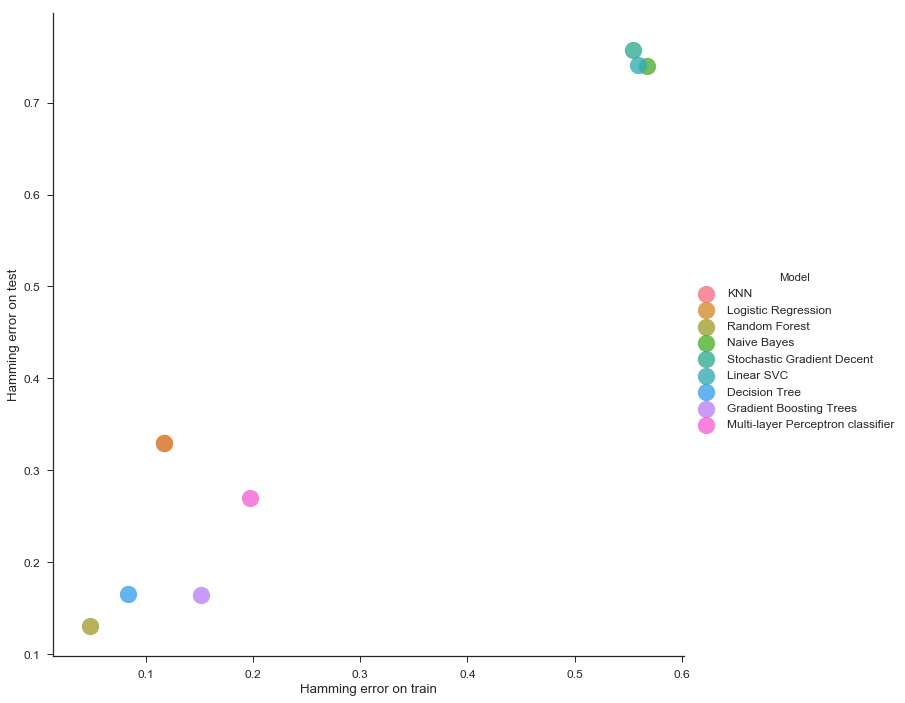

In [292]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Hamming error on train': [
hamming_train_knn_sm,
hamming_train_knn_sm,
hamming_train_rf_sm,
hamming_train_gaussian_sm,
hamming_train_sgd_sm,
hamming_train_svc_sm,
hamming_train_dt_sm,
hamming_train_gbt_sm,
hamming_train_mlp_sm
],
'Hamming error on test': [
hamming_test_knn_sm,
hamming_test_knn_sm,
hamming_test_rf_sm,
hamming_test_gaussian_sm,
hamming_test_sgd_sm,
hamming_test_svc_sm,
hamming_test_dt_sm,
hamming_test_gbt_sm,
hamming_test_mlp_sm
]})


sns.set_style('ticks')
fig=sns.lmplot('Hamming error on train', # Horizontal axis
           'Hamming error on test', # Vertical axis
           data=models, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Model", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 300},size=10) # S marker size

plt.show()

### Random oversampling

In [293]:
OS = RandomOverSampler()
osx, osy = OS.fit_sample(x_train, y_train)

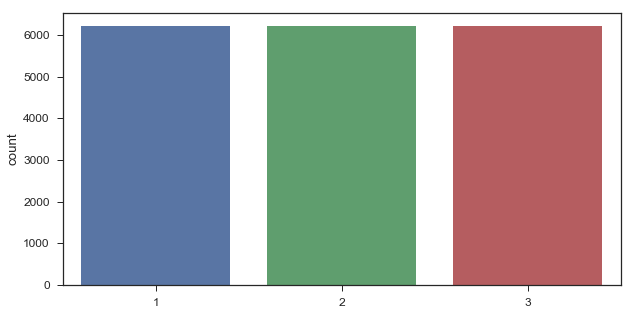

In [294]:
sns.countplot(osy)

In [295]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],'class_weight': [None, 'balanced'],'C': np.logspace(-20, 20, 10000),
'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,n_jobs=-1,param_distributions=param_dist,n_iter=n_iter_search)

start = time.time()
random_search.fit(osx, osy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 238.75 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.530 (std: 0.009)
Parameters: {'penalty': 'l1', 'C': 4778239639328.0889, 'intercept_scaling': 1.1641437226092517, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.528 (std: 0.008)
Parameters: {'penalty': 'l1', 'C': 1084434986063.9719, 'intercept_scaling': 13890384.621834127, 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.526 (std: 0.005)
Parameters: {'penalty': 'l1', 'C': 0.2343888745440823, 'intercept_scaling': 5.3997448301046495e-17, 'class_weight': None}

Model with rank: 4
Mean validation score: 0.526 (std: 0.007)
Parameters: {'penalty': 'l2', 'C': 585028088021.50098, 'intercept_scaling': 2.0536728095558796e-15, 'class_weight': None}

Model with rank: 5
Mean validation score: 0.523 (std: 0.006)
Parameters: {'penalty': 'l1', 'C': 0.044654474870503086, 'intercept_scaling': 1.3699782471187357e-13, 'class_weight': 'balanced'

#### Logistic Regression

In [296]:
# Logistic Regression
start_time = time.time()
train_pred_log_os, test_pred_log_os, acc_log_os, acc_cv_log_os, probs_log_os,log_model_os = fit_ml_algo(LogisticRegression(C=385.7079814977551,penalty='l2',n_jobs=-1),osx,osy,x_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log_os)
print("Accuracy CV 10‐Fold: %s" % acc_cv_log_os)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 52.03
Accuracy CV 10‐Fold: 53.11
Running Time: 0:00:08.987000


In [297]:
acc_log_test_os= metrics.accuracy_score(y_test,test_pred_log_os)
acc_log_test_os

0.52031978680879409

In [298]:
print metrics.classification_report(y_test, test_pred_log_os)

             precision    recall  f1-score   support

          1       0.02      0.50      0.03        10
          2       0.13      0.37      0.19       138
          3       0.95      0.54      0.68      1353

avg / total       0.87      0.52      0.63      1501



In [299]:
hamming_train_log_osm=metrics.hamming_loss(osy,train_pred_log_os)
hamming_train_log_osm

0.46890747292805834

In [300]:
hamming_test_log_osm=metrics.hamming_loss(y_test,test_pred_log_os)
hamming_test_log_osm

0.47968021319120585

In [301]:
log_model_os

LogisticRegression(C=385.707981498, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Random Forest Classifier

In [302]:
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],"max_features": sp_randint(1, 11),"min_samples_split": sp_randint(2, 20),"min_samples_leaf": sp_randint(1, 11),"bootstrap": [True, False],"criterion": ["gini", "entropy"]}
# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,n_jobs = -1,param_distributions=param_dist,n_iter=n_iter_search)
start = time.time()
random_search.fit(osx, osy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 4.96 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.981 (std: 0.003)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 8, 'criterion': 'gini', 'max_features': 5, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.942 (std: 0.001)
Parameters: {'bootstrap': False, 'min_samples_leaf': 8, 'min_samples_split': 13, 'criterion': 'entropy', 'max_features': 7, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.912 (std: 0.000)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 10, 'max_depth': 10}

Model with rank: 4
Mean validation score: 0.896 (std: 0.005)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 19, 'criterion': 'entropy', 'max_features': 7, 'max_depth': 10}

Model with rank: 5
Mean validation score: 0.895 (std: 0.008)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1

In [303]:
# Random Forest Classifier
random.seed(123)
start_time = time.time()
rfc = RandomForestClassifier(min_samples_leaf=6,min_samples_split=19,criterion='gini',max_features=10)
train_pred_rf_os, test_pred_rf_os, acc_rf_os, acc_cv_rf_os, probs_rf_os,rf_model_os = fit_ml_algo(rfc,osx,osy,x_test,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf_os)
print("Accuracy CV 10‐Fold: %s" % acc_cv_rf_os)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 80.41
Accuracy CV 10‐Fold: 94.44
Running Time: 0:00:04.684000


In [304]:
acc_rf_test_os= metrics.accuracy_score(y_test,test_pred_rf_os)
print acc_rf_test_os

0.804130579614


In [305]:
print metrics.classification_report(y_test, test_pred_rf_os)

             precision    recall  f1-score   support

          1       0.10      0.20      0.13        10
          2       0.27      0.59      0.37       138
          3       0.96      0.83      0.89      1353

avg / total       0.89      0.80      0.84      1501



In [306]:
hamming_train_rf_os=metrics.hamming_loss(osy,train_pred_rf_os)
hamming_train_rf_os

0.055644901897716308

In [307]:
hamming_test_rf_os=metrics.hamming_loss(y_test,test_pred_rf_os)
hamming_test_rf_os

0.19586942038640906

In [308]:
rf_model_os

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=19,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Gradient Boosting Trees

In [309]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt_os, test_pred_gbt_os, acc_gbt_os, acc_cv_gbt_os, probs_gbt_os,gbt_model_os = fit_ml_algo(GradientBoostingClassifier(),osx,osy,x_test,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt_os)
print("Accuracy CV 10‐Fold: %s" % acc_cv_gbt_os)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 74.55
Accuracy CV 10‐Fold: 81.09
Running Time: 0:00:35.605000


In [310]:
acc_gbt_test_os= metrics.accuracy_score(y_test,test_pred_gbt_os)
acc_gbt_test_os

0.74550299800133246

In [311]:
print metrics.classification_report(y_test, test_pred_gbt_os)

             precision    recall  f1-score   support

          1       0.03      0.30      0.05        10
          2       0.25      0.61      0.35       138
          3       0.98      0.76      0.86      1353

avg / total       0.90      0.75      0.80      1501



In [312]:
gbt_model_os

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [313]:
hamming_train_gbt_os=metrics.hamming_loss(osy,train_pred_gbt_os)
hamming_train_gbt_os

0.1891283370858797

In [314]:
hamming_test_gbt_os=metrics.hamming_loss(y_test,test_pred_gbt_os)
hamming_test_gbt_os

0.25449700199866754

In [315]:
preds=gbt_model_os.predict(X_pred)
print type(preds)
print type(X_ids)

gbt_out=pd.DataFrame({"Collision Reference No.":X_ids,"Collision Severity":preds})
gbt_out["Collision Severity"]=gbt_out["Collision Severity"].astype('int64')
gbt_out["Collision Reference No."]=gbt_out["Collision Reference No."].astype('int64')
gbt_out.to_csv("results.csv", encoding='utf-8', index=False)

NameError: name 'X_pred' is not defined

#### Decision Tree Classifier

In [316]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt_os, test_pred_dt_os, acc_dt_os, acc_cv_dt_os, probs_dt_os,dt_model_os = fit_ml_algo(DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10,min_samples_leaf=2),osx,osy,x_test,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt_os)
print("Accuracy CV 10‐Fold: %s" % acc_cv_dt_os)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 75.68
Accuracy CV 10‐Fold: 86.23
Running Time: 0:00:02.896000


In [318]:
acc_dt_test_os= metrics.accuracy_score(y_test,test_pred_dt_os)
acc_dt_test_os

0.75682878081279148

In [319]:
print metrics.classification_report(y_test, test_pred_dt_os)

             precision    recall  f1-score   support

          1       0.01      0.10      0.02        10
          2       0.25      0.55      0.34       138
          3       0.95      0.78      0.86      1353

avg / total       0.88      0.76      0.81      1501



In [320]:
hamming_train_dt_os=metrics.hamming_loss(osy,train_pred_dt_os)
hamming_train_dt_os

0.13771845180658304

In [321]:
hamming_test_dt_os=metrics.hamming_loss(y_test,test_pred_dt_os)
hamming_test_dt_os

0.24317121918720852

In [322]:
dt_model_os

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [323]:
# k‐Nearest Neighbors
start_time = time.time()
train_pred_knn_os, test_pred_knn_os, acc_knn_os, acc_cv_knn_os, probs_knn_os,knn_model_os = fit_ml_algo(KNeighborsClassifier(n_neighbors = 5,n_jobs =-1),
                                                                            osx,osy,x_test,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn_os)
print("Accuracy CV 10‐Fold: %s" % acc_cv_knn_os)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 72.62
Accuracy CV 10‐Fold: 91.38
Running Time: 0:00:04.030000


In [324]:
acc_knn_test_os= metrics.accuracy_score(osy,train_pred_knn_os)
acc_knn_test_os

0.91379864908330655

In [325]:
print metrics.accuracy_score(y_test,test_pred_knn_os)

0.72618254497


In [326]:
hamming_train_knn_os=metrics.hamming_loss(smoy,train_pred_knn_os)
hamming_train_knn_os

0.086201350916693467

In [327]:
hamming_test_knn_os=metrics.hamming_loss(y_test,test_pred_knn_os)
hamming_test_knn_os

0.27381745502998001

#### Gaussian naive bayes

In [328]:
#Gaussian naive bayes
start_time = time.time()
train_pred_gaussian_os, test_pred_gaussian_os, acc_gaussian_os, acc_cv_gaussian_os, probs_gau_os,gau_model_os =fit_ml_algo(GaussianNB(),osx,osy,x_test,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian_os)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian_os)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 11.66
Accuracy CV 10-Fold: 36.93
Running Time: 0:00:02.254000


In [329]:
acc_gaussian_test_os= metrics.accuracy_score(osy,train_pred_gaussian_os)
acc_gaussian_test_os

0.36925056288195562

In [330]:
print metrics.accuracy_score(y_test,test_pred_gaussian_os)

0.116588940706


In [331]:
hamming_train_gaussian_os=metrics.hamming_loss(osy,train_pred_gaussian_os)
hamming_train_gaussian_os

0.63074943711804443

In [332]:
hamming_test_gaussian_os=metrics.hamming_loss(y_test,test_pred_gaussian_os)
hamming_test_gaussian_os

0.88341105929380415

#### Stochastic Gradient Descent

In [333]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd_os, test_pred_sgd_os, acc_sgd_os, acc_cv_sgd_os, _,sgd_model_os = fit_ml_algo(SGDClassifier(n_jobs = -1,class_weight='balanced',loss='hinge'),osx,osy,x_test,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd_os)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd_os)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 32.38
Accuracy CV 10-Fold: 43.78
Running Time: 0:00:02.958000


In [334]:
acc_sgd_test_os= metrics.accuracy_score(osy,train_pred_sgd_os)
acc_sgd_test_os

0.43776133805082018

In [335]:
print metrics.accuracy_score(y_test,test_pred_sgd_os)

0.323784143904


In [336]:
hamming_train_sgd_os=metrics.hamming_loss(osy,train_pred_sgd_os)
hamming_train_sgd_os

0.56223866194917982

In [337]:
hamming_test_sgd_os=metrics.hamming_loss(y_test,test_pred_sgd_os)
hamming_test_sgd_os

0.67621585609593604

#### Multi-layer Perceptron classifier -- Weekend

In [338]:
# Multi-layer Perceptron classifier -- Weekend
start_time = time.time()
mlp = MLPClassifier()
train_pred_mlp_os, test_pred_mlp_os, acc_mlp_os, acc_cv_mlp_os, probs_mlp_os,mlp_model_os = fit_ml_algo(mlp,osx,osy,x_test,10)
svr_time = (time.time() - start_time)
print("Accuracy: %s" % acc_mlp_os)
print("Accuracy CV 10-Fold: %s" % acc_cv_mlp_os)
print("Running Time: %s" % datetime.timedelta(seconds=svr_time))

Accuracy: 72.75
Accuracy CV 10-Fold: 80.71
Running Time: 0:00:48.857000


In [339]:
acc_mlp_test_os= metrics.accuracy_score(osy,train_pred_mlp_os)
acc_mlp_test_os

0.80711911654336876

In [340]:
print metrics.accuracy_score(y_test,test_pred_mlp_os)

0.727514990007


In [341]:
hamming_train_mlp_os=metrics.hamming_loss(osy,train_pred_mlp_os)
hamming_train_mlp_os

0.19288088345663129

In [342]:
hamming_test_mlp_os=metrics.hamming_loss(y_test,test_pred_mlp_os)
hamming_test_mlp_os

0.2724850099933378

#### Linear SVC

In [343]:
#Linear SVC
start_time = time.time()
train_pred_svc_os, test_pred_svc_os, acc_linear_svc_os, acc_cv_linear_svc_os, probs_svc_os,svc_model_os = fit_ml_algo(LinearSVC(loss='hinge'),osx,osy,x_test,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc_os)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc_os)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 90.14
Accuracy CV 10-Fold: 40.05
Running Time: 0:00:54.661000


In [344]:
acc_svc_test_os= metrics.accuracy_score(osy,train_pred_svc_os)
acc_svc_test_os

0.40050391336978663

In [345]:
print metrics.accuracy_score(y_test,test_pred_svc_os)

0.901399067288


In [346]:
hamming_train_svc_os=metrics.hamming_loss(smoy,train_pred_svc_os)
hamming_train_svc_os

0.59949608663021337

In [347]:
hamming_test_svc_os=metrics.hamming_loss(y_test,test_pred_svc_os)
hamming_test_svc_os

0.098600932711525646

In [348]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_os,
acc_log_os,
acc_rf_os,
acc_gaussian_os,
acc_sgd_os,
acc_linear_svc_os,
acc_dt_os,
acc_gbt_os,
acc_mlp_os
]})


models.sort_values(by='Score', ascending=False)


,Model,Score
5,Linear SVC,90.14
2,Random Forest,80.41
6,Decision Tree,75.68
7,Gradient Boosting Trees,74.55
8,Multi-layer Perceptron classifier,72.75
0,KNN,72.62
1,Logistic Regression,52.03
4,Stochastic Gradient Decent,32.38
3,Naive Bayes,11.66


In [350]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_cv_knn_os,
acc_cv_log_os,
acc_cv_rf_os,
acc_cv_gaussian_os,
acc_cv_sgd_os,
acc_cv_linear_svc_os,
acc_cv_dt_os,
acc_cv_gbt_os,
acc_cv_mlp_os
]})


models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,94.44
0,KNN,91.38
6,Decision Tree,86.23
7,Gradient Boosting Trees,81.09
8,Multi-layer Perceptron classifier,80.71
1,Logistic Regression,53.11
4,Stochastic Gradient Decent,43.78
5,Linear SVC,40.05
3,Naive Bayes,36.93


In [351]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_test_os,
acc_log_test_os,
acc_rf_test_os,
acc_gaussian_test_os,
acc_sgd_test_os,
acc_svc_test_os,
acc_dt_test_os,
acc_gbt_test_os,
acc_mlp_test_os
]})


models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.913799
8,Multi-layer Perceptron classifier,0.807119
2,Random Forest,0.804131
6,Decision Tree,0.756829
7,Gradient Boosting Trees,0.745503
1,Logistic Regression,0.520320
4,Stochastic Gradient Decent,0.437761
5,Linear SVC,0.400504
3,Naive Bayes,0.369251


In [352]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Difference in hamming error': [
hamming_train_knn_os-hamming_test_knn_os,
hamming_train_knn_os-hamming_test_knn_os,
hamming_train_rf_os-hamming_test_rf_os,
hamming_train_gaussian_os-hamming_test_gaussian_os,
hamming_train_sgd_os-hamming_test_sgd_os,
hamming_train_svc_os-hamming_test_svc_os,
hamming_train_dt_os-hamming_test_dt_os,
hamming_train_gbt_os-hamming_test_gbt_os,
hamming_train_mlp_os-hamming_test_mlp_os
]})
models.sort_values(by='Difference in hamming error', ascending=False)

,Difference in hamming error,Model
5,0.500895,Linear SVC
7,-0.065369,Gradient Boosting Trees
8,-0.079604,Multi-layer Perceptron classifier
6,-0.105453,Decision Tree
4,-0.113977,Stochastic Gradient Decent
2,-0.140225,Random Forest
0,-0.187616,KNN
1,-0.187616,Logistic Regression
3,-0.252662,Naive Bayes


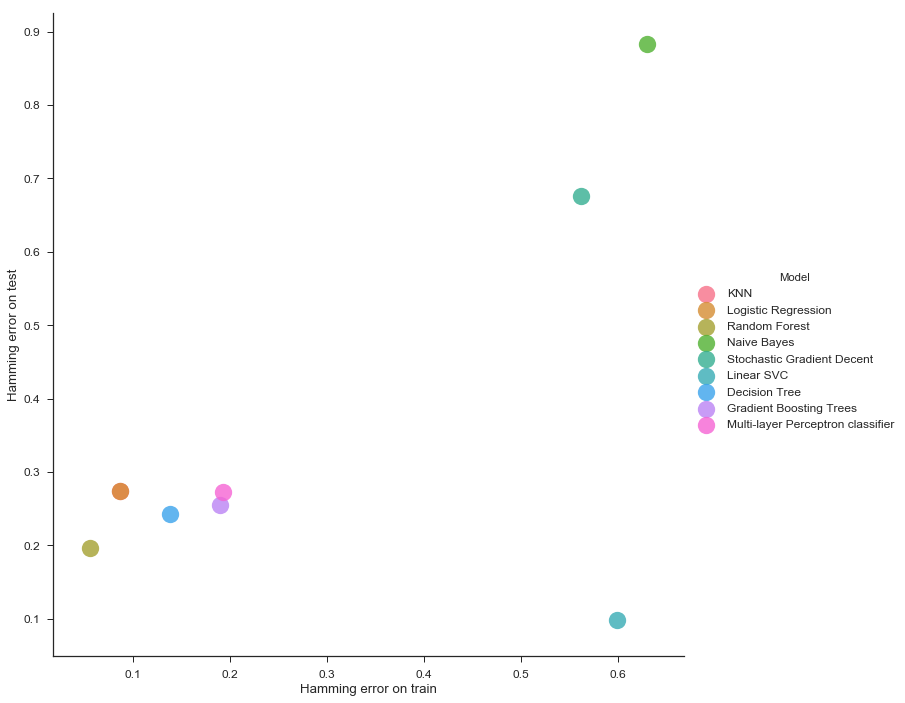

In [353]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Hamming error on train': [
hamming_train_knn_os,
hamming_train_knn_os,
hamming_train_rf_os,
hamming_train_gaussian_os,
hamming_train_sgd_os,
hamming_train_svc_os,
hamming_train_dt_os,
hamming_train_gbt_os,
hamming_train_mlp_os
],
'Hamming error on test': [
hamming_test_knn_os,
hamming_test_knn_os,
hamming_test_rf_os,
hamming_test_gaussian_os,
hamming_test_sgd_os,
hamming_test_svc_os,
hamming_test_dt_os,
hamming_test_gbt_os,
hamming_test_mlp_os
]})


sns.set_style('ticks')
fig=sns.lmplot('Hamming error on train', # Horizontal axis
           'Hamming error on test', # Vertical axis
           data=models, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Model", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 300},size=10) # S marker size

plt.show()


### SMOTE with svm

In [354]:
# 'SMOTE SVM'
svmsmote = SMOTE(kind='svm')
svsx, svsy = svmsmote.fit_sample(x_train, y_train)

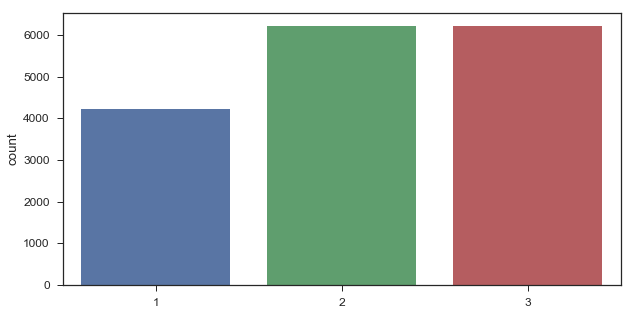

In [355]:
sns.countplot(svsy)

In [356]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],'class_weight': [None, 'balanced'],'C': np.logspace(-20, 20, 10000),
'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,n_jobs=-1,param_distributions=param_dist,n_iter=n_iter_search)

start = time.time()
random_search.fit(svsx, svsy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 8.06 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.624 (std: 0.083)
Parameters: {'penalty': 'l2', 'C': 1640293228.9384408, 'intercept_scaling': 0.12300109873759231, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.610 (std: 0.071)
Parameters: {'penalty': 'l2', 'C': 166925.33336248045, 'intercept_scaling': 1.3225501259717211e-06, 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.609 (std: 0.072)
Parameters: {'penalty': 'l1', 'C': 0.20603044148138386, 'intercept_scaling': 1.620022148337893e-05, 'class_weight': 'balanced'}

Model with rank: 4
Mean validation score: 0.373 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 5.4610195009087026e-08, 'intercept_scaling': 89226.744863022512, 'class_weight': None}

Model with rank: 4
Mean validation score: 0.373 (std: 0.000)
Parameters: {'penalty': 'l2', 'C': 0.0049404826324913938, 'intercept_scaling': 22842091.852665372, 'class_weight': None

In [358]:
# Logistic Regression
start_time = time.time()
train_pred_log_svms, test_pred_log_svms, acc_log_svms, acc_cv_log_svms, probs_log_svms,log_model_svms = fit_ml_algo(LogisticRegression(C=4511.9620333049561,penalty='l2',n_jobs=-1,class_weight='balanced'),svsx,svsy,x_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log_svms)
print("Accuracy CV 10‐Fold: %s" % acc_cv_log_svms)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 64.49
Accuracy CV 10‐Fold: 64.7
Running Time: 0:00:06.527000


In [359]:
acc_log_test_svms= metrics.accuracy_score(y_test,test_pred_log_svms)
acc_log_test_svms

0.6449033977348434

In [360]:
print metrics.classification_report(y_test, test_pred_log_svms)

             precision    recall  f1-score   support

          1       0.02      0.50      0.04        10
          2       0.16      0.35      0.22       138
          3       0.93      0.68      0.78      1353

avg / total       0.86      0.64      0.73      1501



In [361]:
hamming_train_log_svms=metrics.hamming_loss(svsy,train_pred_log_svms)
hamming_train_log_svms

0.35296589817483187

In [362]:
hamming_test_log_svms=metrics.hamming_loss(y_test,test_pred_log_svms)
hamming_test_log_svms

0.35509660226515655

In [363]:
log_model_svms

LogisticRegression(C=4511.9620333, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [364]:
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],"max_features": sp_randint(1, 11),"min_samples_split": sp_randint(2, 20),"min_samples_leaf": sp_randint(1, 11),"bootstrap": [True, False],"criterion": ["gini", "entropy"]}
# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,n_jobs = -1,param_distributions=param_dist,n_iter=n_iter_search)
start = time.time()
random_search.fit(svsx, svsy)
print("RandomizedSearchCV took %.2f seconds for %d candidates"" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 7.94 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.931 (std: 0.044)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'min_samples_split': 16, 'criterion': 'gini', 'max_features': 6, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.927 (std: 0.043)
Parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 5, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.925 (std: 0.044)
Parameters: {'bootstrap': False, 'min_samples_leaf': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_features': 9, 'max_depth': None}

Model with rank: 4
Mean validation score: 0.916 (std: 0.040)
Parameters: {'bootstrap': True, 'min_samples_leaf': 7, 'min_samples_split': 16, 'criterion': 'entropy', 'max_features': 7, 'max_depth': None}

Model with rank: 5
Mean validation score: 0.916 (std: 0.043)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1

In [365]:
random.seed(123)
start_time = time.time()
rfc = RandomForestClassifier(bootstrap=False,min_samples_leaf=2,min_samples_split=6,criterion='gini',max_features=4)
train_pred_rf_svms, test_pred_rf_svms, acc_rf_svms, acc_cv_rf_svms, probs_rf_svms,rf_model_svms = fit_ml_algo(rfc,svsx,svsy,x_test,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf_svms)
print("Accuracy CV 10‐Fold: %s" % acc_cv_rf_svms)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 86.81
Accuracy CV 10‐Fold: 95.18
Running Time: 0:00:05.090000


In [366]:
acc_rf_test_svms= metrics.accuracy_score(y_test,test_pred_rf_svms)
acc_rf_test_svms

0.8680879413724184

In [367]:
print metrics.classification_report(y_test, test_pred_rf_svms)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        10
          2       0.28      0.22      0.25       138
          3       0.92      0.94      0.93      1353

avg / total       0.85      0.87      0.86      1501



In [368]:
hamming_train_rf_svms=metrics.hamming_loss(svsy,train_pred_rf_svms)
hamming_train_rf_svms

0.048150816522574448

In [369]:
hamming_test_rf_svms=metrics.hamming_loss(y_test,test_pred_rf_svms)
hamming_test_rf_svms

0.13191205862758162

In [370]:
rf_model_svms

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### K-Nearest Neighbors

In [371]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn_svms, test_pred_knn_svms, acc_knn_svms, acc_cv_knn_svms, probs_knn_svms,knn_model_svms = fit_ml_algo(KNeighborsClassifier(n_neighbors = 5,n_jobs =-1),
                                                                            svsx,svsy,x_test,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn_svms)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn_svms)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 73.95
Accuracy CV 10-Fold: 90.18
Running Time: 0:00:03.723000


In [372]:
acc_knn_test_svms= metrics.accuracy_score(svsy,train_pred_knn_svms)
acc_knn_test_svms

0.90183717579250722

In [373]:
print metrics.accuracy_score(y_test,test_pred_knn_svms)

0.739506995336


In [374]:
hamming_train_knn_svms=metrics.hamming_loss(svsy,train_pred_knn_svms)
hamming_train_knn_svms

0.098162824207492796

In [375]:
hamming_test_knn_svms=metrics.hamming_loss(y_test,test_pred_knn_svms)
hamming_test_knn_svms

0.26049300466355763

In [376]:
#Gaussian naive bayes
start_time = time.time()
train_pred_gaussian_svms, test_pred_gaussian_svms, acc_gaussian_svms, acc_cv_gaussian_svms, probs_gau_svms,gau_model_svms =fit_ml_algo(GaussianNB(),svsx,svsy,x_test,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian_svms)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian_svms)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 25.72
Accuracy CV 10-Fold: 34.73
Running Time: 0:00:02.670000


In [377]:
acc_gaussian_test_svms= metrics.accuracy_score(svsy,train_pred_gaussian_svms)
acc_gaussian_test_svms

0.34732228626320844

In [378]:
print metrics.accuracy_score(y_test,test_pred_gaussian_svms)

0.257161892072


In [379]:
hamming_train_gaussian_svms=metrics.hamming_loss(svsy,train_pred_gaussian_svms)
hamming_train_gaussian_svms

0.65267771373679151

In [380]:
hamming_test_gaussian_svms=metrics.hamming_loss(y_test,test_pred_gaussian_svms)
hamming_test_gaussian_svms

0.74283810792804794

In [381]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd_svms, test_pred_sgd_svms, acc_sgd_svms, acc_cv_sgd_svms, _,sgd_model_svms = fit_ml_algo(SGDClassifier(n_jobs = -1,class_weight='balanced',loss='hinge'),svsx,svsy,x_test,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd_svms)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd_svms)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 81.35
Accuracy CV 10-Fold: 54.95
Running Time: 0:00:02.865000


In [382]:
acc_sgd_test_svms= metrics.accuracy_score(svsy,train_pred_sgd_svms)
acc_sgd_test_svms

0.54953170028818443

In [383]:
print metrics.accuracy_score(y_test,test_pred_sgd_svms)

0.81345769487


In [384]:
hamming_train_sgd_svms=metrics.hamming_loss(svsy,train_pred_sgd_svms)
hamming_train_sgd_svms

0.45046829971181557

In [385]:
hamming_test_sgd_svms=metrics.hamming_loss(y_test,test_pred_sgd_svms)
hamming_test_sgd_svms

0.18654230512991338

In [386]:
#Linear SVC
start_time = time.time()
train_pred_svc_svms, test_pred_svc_svms, acc_linear_svc_svms, acc_cv_linear_svc_svms, probs_svc_svms,svc_model_svms = fit_ml_algo(LinearSVC(loss='hinge'),svsx,svsy,x_test,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc_svms)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc_svms)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 83.94
Accuracy CV 10-Fold: 59.67
Running Time: 0:00:47.798000


In [387]:
acc_svc_test_svms= metrics.accuracy_score(svsy,train_pred_svc_svms)
acc_svc_test_svms

0.59672190201729103

In [388]:
print metrics.accuracy_score(y_test,test_pred_svc_svms)

0.839440373085


In [389]:
hamming_train_svc_svms=metrics.hamming_loss(svsy,train_pred_svc_svms)
hamming_train_svc_svms

0.40327809798270892

In [390]:
hamming_test_svc_svms=metrics.hamming_loss(y_test,test_pred_svc_svms)
hamming_test_svc_svms

0.16055962691538975

In [391]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt_svms, test_pred_dt_svms, acc_dt_svms, acc_cv_dt_svms, probs_dt_svms,dt_model_svms = fit_ml_algo(DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10,min_samples_leaf=2),svsx,svsy,x_test,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt_svms)
print("Accuracy CV 10‐Fold: %s" % acc_cv_dt_svms)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 82.54
Accuracy CV 10‐Fold: 89.71
Running Time: 0:00:03.384000


In [392]:
acc_dt_test_svms= metrics.accuracy_score(svsy,train_pred_dt_svms)
acc_dt_test_svms

0.89709414024975986

In [393]:
print metrics.accuracy_score(y_test,test_pred_svc_svms)

0.839440373085


In [394]:
hamming_train_dt_svms=metrics.hamming_loss(svsy,train_pred_dt_svms)
hamming_train_dt_svms

0.10290585975024015

In [395]:
hamming_test_dt_svms=metrics.hamming_loss(y_test,test_pred_dt_svms)
hamming_test_dt_svms

0.17455029980013326

In [396]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt_svms, test_pred_gbt_svms, acc_gbt_svms, acc_cv_gbt_svms, probs_gbt_svms,gbt_model_svms = fit_ml_algo(GradientBoostingClassifier(),svsx,svsy,x_test,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt_svms)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt_svms)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.14
Accuracy CV 10-Fold: 89.97
Running Time: 0:00:40.871000


In [397]:
acc_gbt_test_svms= metrics.accuracy_score(svsy,train_pred_gbt_svms)

In [398]:
acc_gbt_test_svms

0.89973583093179632

In [399]:
print metrics.accuracy_score(y_test,test_pred_gbt_svms)

0.861425716189


In [400]:
hamming_train_gbt_svms=metrics.hamming_loss(svsy,train_pred_gbt_svms)
hamming_train_gbt_svms

0.10026416906820365

In [401]:
hamming_test_gbt_svms=metrics.hamming_loss(y_test,test_pred_gbt_svms)
hamming_test_gbt_svms

0.13857428381079281

In [402]:
# Multi-layer Perceptron classifier -- Weekend
start_time = time.time()
mlp = MLPClassifier()
train_pred_mlp_svms, test_pred_mlp_svms, acc_mlp_svms, acc_cv_mlp_svms, probs_mlp_svms,mlp_model_svms = fit_ml_algo(mlp,svsx,svsy,x_test,10)
svr_time = (time.time() - start_time)
print("Accuracy: %s" % acc_mlp_svms)
print("Accuracy CV 10-Fold: %s" % acc_cv_mlp_svms)
print("Running Time: %s" % datetime.timedelta(seconds=svr_time))

Accuracy: 79.01
Accuracy CV 10-Fold: 84.21
Running Time: 0:00:36.963000


In [403]:
acc_mlp_test_svms= metrics.accuracy_score(svsy,train_pred_mlp_svms)
acc_mlp_test_svms

0.84209894332372714

In [404]:
print metrics.accuracy_score(y_test,test_pred_mlp_svms)

0.790139906729


In [405]:
hamming_train_mlp_svms=metrics.hamming_loss(svsy,train_pred_mlp_svms)
hamming_train_mlp_svms

0.15790105667627283

In [406]:
hamming_test_mlp_svms=metrics.hamming_loss(y_test,test_pred_mlp_svms)
hamming_test_mlp_svms

0.20986009327115257

In [407]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_svms,
acc_log_svms,
acc_rf_svms,
acc_gaussian_svms,
acc_sgd_svms,
acc_linear_svc_svms,
acc_dt_svms,
acc_gbt_svms,
acc_mlp_svms
]})

In [408]:
models.sort_values(by='Score', ascending=False)


,Model,Score
2,Random Forest,86.81
7,Gradient Boosting Trees,86.14
5,Linear SVC,83.94
6,Decision Tree,82.54
4,Stochastic Gradient Decent,81.35
8,Multi-layer Perceptron classifier,79.01
0,KNN,73.95
1,Logistic Regression,64.49
3,Naive Bayes,25.72


In [409]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_cv_knn_svms,
acc_cv_log_svms,
acc_cv_rf_svms,
acc_cv_gaussian_svms,
acc_cv_sgd_svms,
acc_cv_linear_svc_svms,
acc_cv_dt_svms,
acc_cv_gbt_svms,
acc_cv_mlp_svms
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,95.18
0,KNN,90.18
7,Gradient Boosting Trees,89.97
6,Decision Tree,89.71
8,Multi-layer Perceptron classifier,84.21
1,Logistic Regression,64.70
5,Linear SVC,59.67
4,Stochastic Gradient Decent,54.95
3,Naive Bayes,34.73


In [410]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Score': [
acc_knn_test_svms,
acc_log_test_svms,
acc_rf_test_svms,
acc_gaussian_test_svms,
acc_sgd_test_svms,
acc_svc_test_svms,
acc_dt_test_svms,
acc_gbt_test_svms,
acc_mlp_test_svms
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.901837
7,Gradient Boosting Trees,0.899736
6,Decision Tree,0.897094
2,Random Forest,0.868088
8,Multi-layer Perceptron classifier,0.842099
1,Logistic Regression,0.644903
5,Linear SVC,0.596722
4,Stochastic Gradient Decent,0.549532
3,Naive Bayes,0.347322


In [411]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Difference in hamming error': [
hamming_train_knn_svms-hamming_test_knn_svms,
hamming_train_knn_svms-hamming_test_knn_svms,
hamming_train_rf_svms-hamming_test_rf_svms,
hamming_train_gaussian_svms-hamming_test_gaussian_svms,
hamming_train_sgd_svms-hamming_test_sgd_svms,
hamming_train_svc_svms-hamming_test_svc_svms,
hamming_train_dt_svms-hamming_test_dt_svms,
hamming_train_gbt_svms-hamming_test_gbt_svms,
hamming_train_mlp_svms-hamming_test_mlp_svms
]})
models.sort_values(by='Difference in hamming error', ascending=False)

,Difference in hamming error,Model
4,0.263926,Stochastic Gradient Decent
5,0.242718,Linear SVC
7,-0.038310,Gradient Boosting Trees
8,-0.051959,Multi-layer Perceptron classifier
6,-0.071644,Decision Tree
2,-0.083761,Random Forest
3,-0.090160,Naive Bayes
0,-0.162330,KNN
1,-0.162330,Logistic Regression


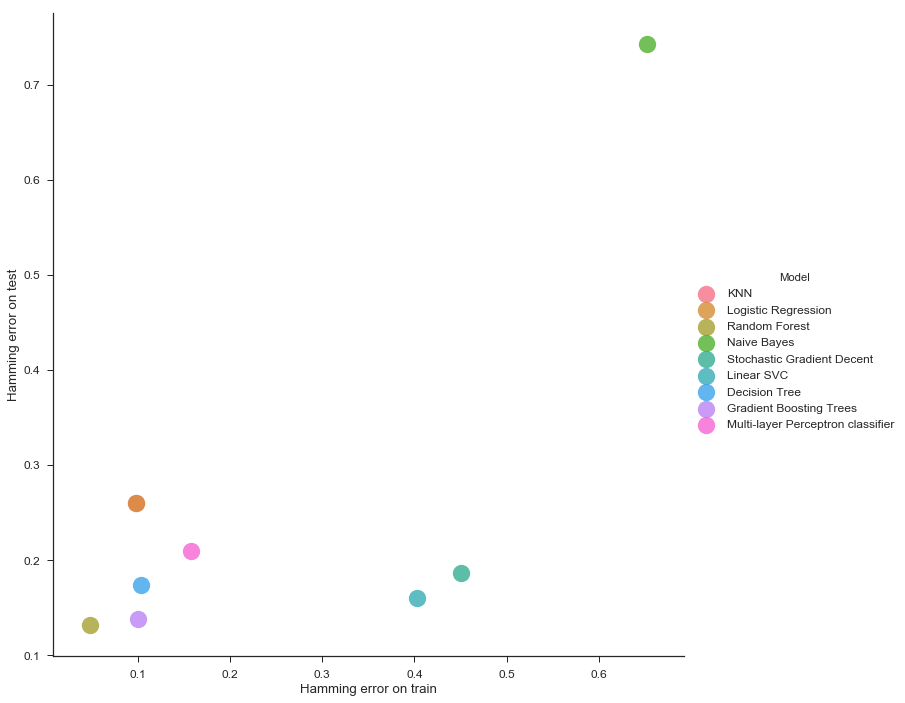

In [412]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees','Multi-layer Perceptron classifier'],
'Hamming error on train': [
hamming_train_knn_svms,
hamming_train_knn_svms,
hamming_train_rf_svms,
hamming_train_gaussian_svms,
hamming_train_sgd_svms,
hamming_train_svc_svms,
hamming_train_dt_svms,
hamming_train_gbt_svms,
hamming_train_mlp_svms
],
'Hamming error on test': [
hamming_test_knn_svms,
hamming_test_knn_svms,
hamming_test_rf_svms,
hamming_test_gaussian_svms,
hamming_test_sgd_svms,
hamming_test_svc_svms,
hamming_test_dt_svms,
hamming_test_gbt_svms,
hamming_test_mlp_svms
]})


sns.set_style('ticks')
fig=sns.lmplot('Hamming error on train', # Horizontal axis
           'Hamming error on test', # Vertical axis
           data=models, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Model", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 300},size=10) # S marker size

plt.show()

## Validation set predictions

In [413]:
accident_pred.columns[accident_pred.isnull().any()]

Index([u'Policing Area', u'Hour of Collision (24 hour)', u'Junction Detail',
       u'Junction Control', u'Pedestrian Crossing  Human Control',
       u'Pedestrian Crossing  Physical Control', u'Road Surface Conditions',
       u'Special Conditions at Site'],
      dtype='object')

In [414]:
miss1 = accident_pred.isnull().sum()/len(accident_pred)
missing_values1 = miss1[miss1 > 0]
missing_values1.sort_values(inplace=True)
missing_values1

Hour of Collision (24 hour)               0.026732
Policing Area                             0.027278
Special Conditions at Site                0.028369
Pedestrian Crossing  Physical Control    0.028914
Pedestrian Crossing  Human Control       0.030551
Road Surface Conditions                   0.030551
Junction Detail                           0.032733
Junction Control                          0.034370
dtype: float64

In [415]:
accident_pred['Policing Area']=pd.get_dummies(accident_pred['Policing Area'])

accident_pred["Weekday of Collision"] = accident_pred["Weekday of Collision"].map({"MON": 1, "TUE": 2, "WED": 3, "THU": 4, "FRI": 5, "SAT": 6, "SUN": 7}).astype(int)

In [416]:
my_cols=accident_pred.columns

In [417]:
train_full = SoftImpute().complete(accident_pred)

[SoftImpute] Max Singular Value of X_init = 329869.335584
[SoftImpute] Iter 1: observed MAE=12.585023 rank=1
[SoftImpute] Iter 2: observed MAE=12.585375 rank=1
[SoftImpute] Iter 3: observed MAE=12.585396 rank=1
[SoftImpute] Stopped after iteration 3 for lambda=6597.386712


In [418]:
X_pred=pd.DataFrame(train_full,columns=my_cols)

In [419]:
X_pred.shape


(1833, 16)

In [420]:
X_ids=X_pred['Collision Reference No.']

In [421]:
X_pred.drop('Collision Reference No.',axis=1,inplace=True)

In [422]:
type(X_ids)

pandas.core.series.Series

## Model Selection

Gradient Boosting Trees model is selected as it is better model after hanlding the imbalaned data using smotting.

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import check_pairwise_arrays


def anova_kernel(X, Y=None, gamma=None, p=1):
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1. / X.shape[1]

    diff = X[:, None, :] - Y[None, :, :]
    diff **= 2
    diff *= -gamma
    np.exp(diff, out=diff)
    K = diff.sum(axis=2)
    K **= p
    return K


K_train = anova_kernel(osx)
clf = Pipeline([
    ('nys', Nystroem(kernel='precomputed', n_components=10)),
    ('lr', LogisticRegression())
])
clf.fit(K_train, osy)

K_test = anova_kernel(x_test, osx)
preds = clf.predict(K_test)